# Colates, cleans and analyses soil heat flux data from Rain shelter barley trail

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions as et
%matplotlib inline
import lmfit as fitter
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.dates as mdates

In [2]:
Data = pd.read_pickle('.\DataFrames\TempAndRadnCleaned.pkl')
Data = Data.loc[:'2015-02-24']
SoilTempData = pd.read_pickle('.\DataFrames\SoilTemp.pkl')
SoilWaterData = pd.read_pickle('.\DataFrames\SoilVWC.pkl')
Data.columns = Data.columns.droplevel(level=[3,4,5,6,7])
Data.sort_index(axis=1, inplace = True)
SoilTempData.sort_index(axis=1, inplace = True)
SoilWaterData.sort_index(axis=1, inplace = True)
Data.sort_index(inplace = True)
SoilTempData.sort_index(inplace = True)
SoilWaterData.sort_index(inplace = True)
RadnDataSums = Data.loc[:,Data.columns.isin(['ReflectedRadnMJ','IncomingRadnMJ'],level=0)].resample('15T').sum()
Data = Data.resample('15T').mean()
Data.loc[:,Data.columns.isin(['ReflectedRadnMJ','IncomingRadnMJ'],level=0)] = RadnDataSums

In [3]:
Cultivars = ['Dash','Omaka']
Irrigations = ['High','Low','Mid']
IrrigationsShort = ['High','Low']
BD = 1.1
CW = 4179 # specific heat capacity of water (J/kg/oK)
CD = 840 # specific heat capacity of dry soil (J/kg/oK)
Cs = BD * CD # heat capaacity of dry soil

Styles = ['b--','b--','b--','b--','r--','r--','r--','r--','g--','g--','g--','g--',
          'b-','b-','b-','b-','r-','r-','r-','r-','g-','g-','g-','g-']

Styles2 = ['b--','b--','b--','r--','r--','r--',
          'b-','b-','b-','r-','r-','r-']

# Have a look at the heat flux plate data 

Text(0,0.5,'HeatFlux (W/m2)')

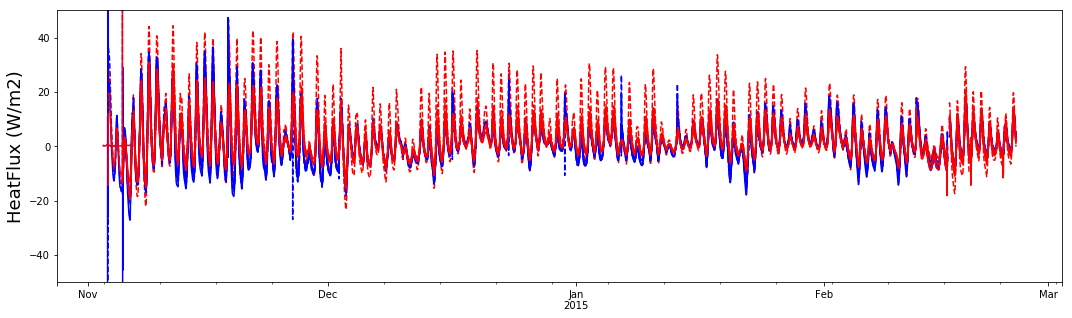

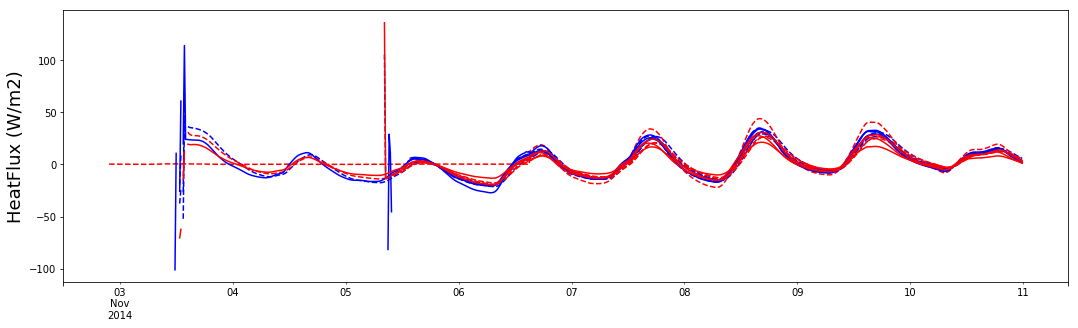

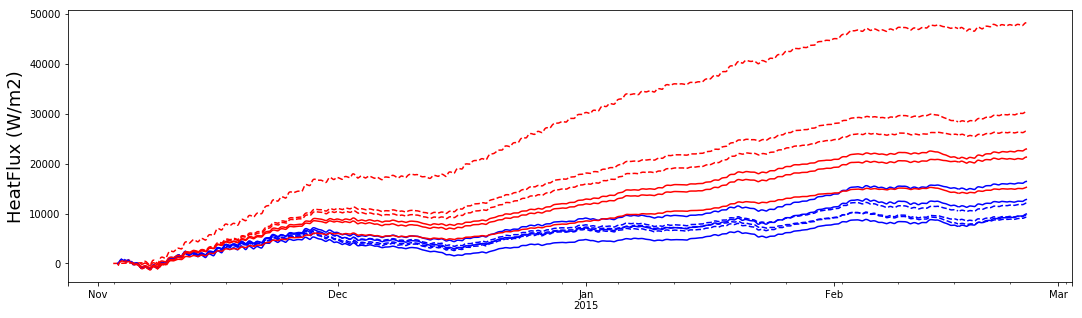

In [4]:
Data.HeatFlux.plot(figsize=(18,5), style = Styles2, legend = False)
plt.ylabel('HeatFlux (W/m2)',fontsize=18)
plt.ylim(-50,50)
Data.HeatFlux.loc['2014-10-1':'2014-11-10'].plot(figsize=(18,5), style = Styles2, legend = False)
plt.ylabel('HeatFlux (W/m2)',fontsize=18)
Data.HeatFlux.cumsum().plot(figsize=(18,5), style = Styles2, legend = False)
plt.ylabel('HeatFlux (W/m2)',fontsize=18)

# There appears to be positive heat flux into the soil and treatment differences 

# Now lets have a look at the soil temperature above the heat flux plates

Text(0,0.5,'Temperature (oC)')

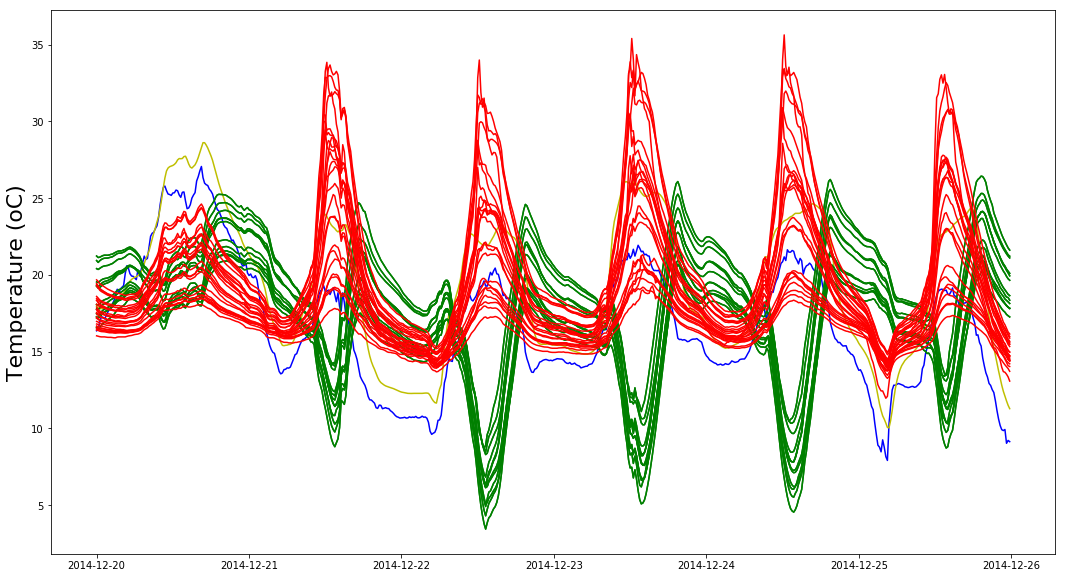

In [5]:
Start = '2014-12-20'
End ='2014-12-25'
figure = plt.figure(figsize=(18,10))
plt.plot(Data.AirTemperature.loc[Start:End], color = 'b')
plt.plot(Data.PannelTemperature.loc[Start:End], color = 'y')
plt.plot(Data.SoilTemp15cm.loc[Start:End], color = 'g')
plt.plot(Data.SoilTemp15cm.loc[Start:End], color = 'g')
plt.plot(Data.SurfaceSoilTemp.loc[Start:End], color = 'r')
plt.ylabel('Temperature (oC)',fontsize=22)
#plt.plot(TopTempDF.loc[Start:End], color = 'k')

# Averaging thermocouple data is shit.  Use temp from cs650 instead

# Get the soil temperatue data for the top 15cm 

Text(0,0.5,'Temperature (oC)')

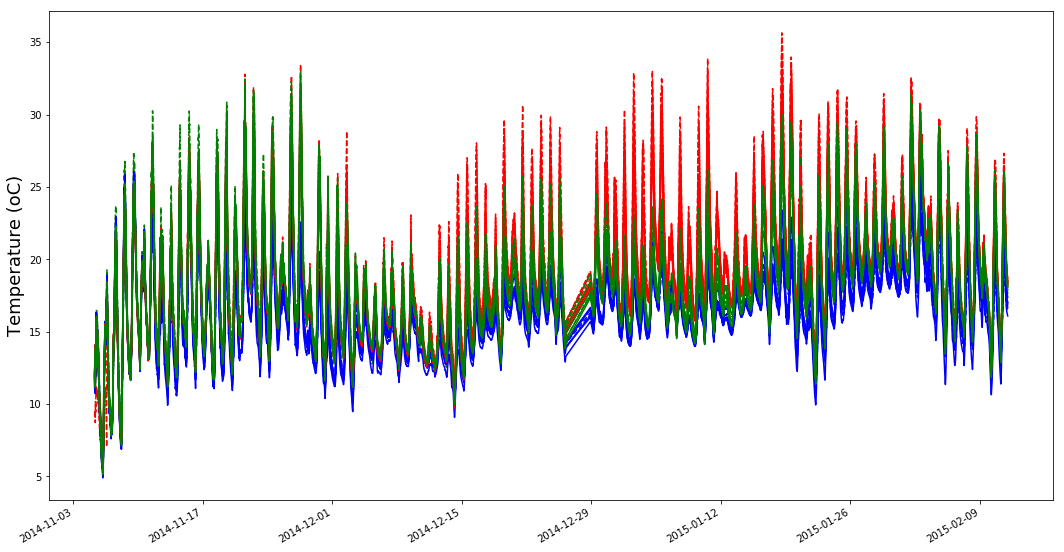

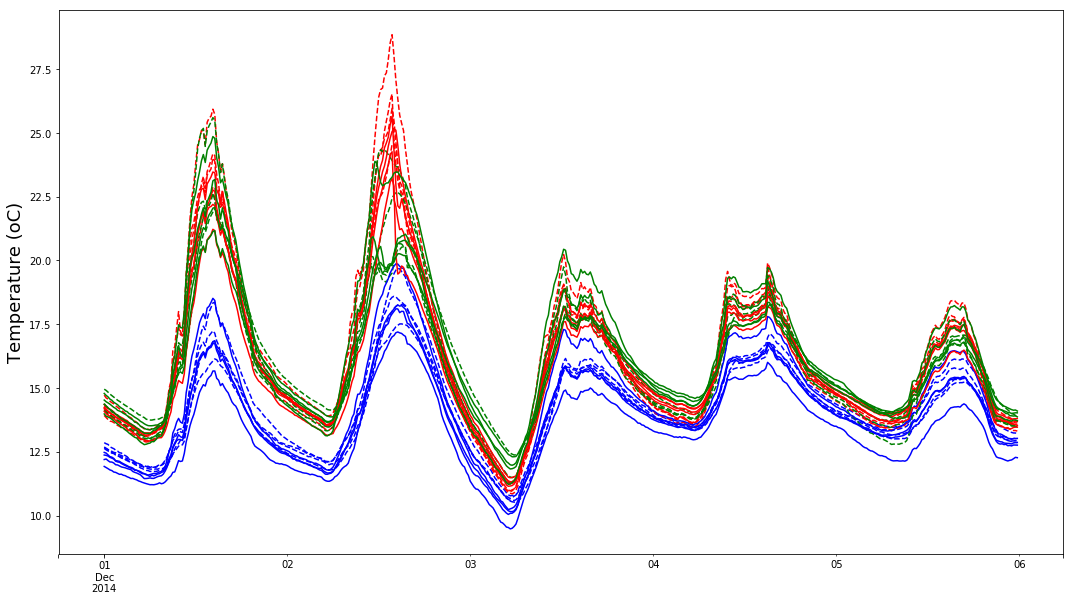

In [6]:
TopTemp = np.add(SoilTempData.loc[:'2015-02-11','D1B'].values,SoilTempData.loc[:'2015-02-11','D1I'].values)
TopTemp /= 2
TopTemp = np.add(TopTemp,SoilTempData.loc[:'2015-02-11','D2'].values)
TopTemp /= 2

tup = ['TopTemp']
reps = [1,2,3,4]
NewIndex = pd.MultiIndex.from_product([tup,Cultivars,Irrigations,reps],names=['Measurement','Cultivar','Irrigation',''])
#NewIndex = NewIndex.droplevel(3)
TopTempDF = pd.DataFrame(data = TopTemp, index = SoilTempData.loc[:'2015-02-11',:].index, columns = NewIndex)

TopTempDF.plot(figsize=(18,10),style=Styles, legend = False)
plt.ylabel('Temperature (oC)',fontsize=18)
TopTempDF.loc['2014-12-1':'2014-12-5'].plot(figsize=(18,10),style=Styles, legend = False)
plt.ylabel('Temperature (oC)',fontsize=18)

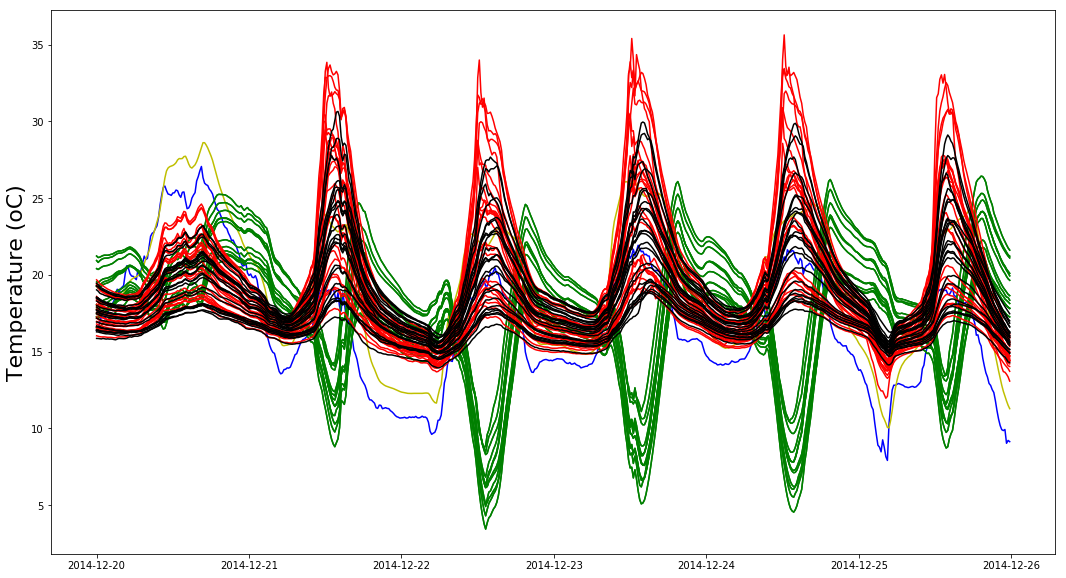

In [7]:
Start = '2014-12-20'
End ='2014-12-25'
figure = plt.figure(figsize=(18,10))
plt.plot(Data.AirTemperature.loc[Start:End], color = 'b')
plt.plot(Data.PannelTemperature.loc[Start:End], color = 'y')
plt.plot(Data.SoilTemp15cm.loc[Start:End], color = 'g')
plt.plot(Data.SoilTemp15cm.loc[Start:End], color = 'g')
plt.plot(Data.SurfaceSoilTemp.loc[Start:End], color = 'r')
plt.ylabel('Temperature (oC)',fontsize=22)
plt.plot(TopTempDF.loc[Start:End], color = 'k')

# The CS650 data is better so use that.

# Bring in the soil water data for the top layer

Text(0,0.5,'Volumetric Water Content (mm/mm)')

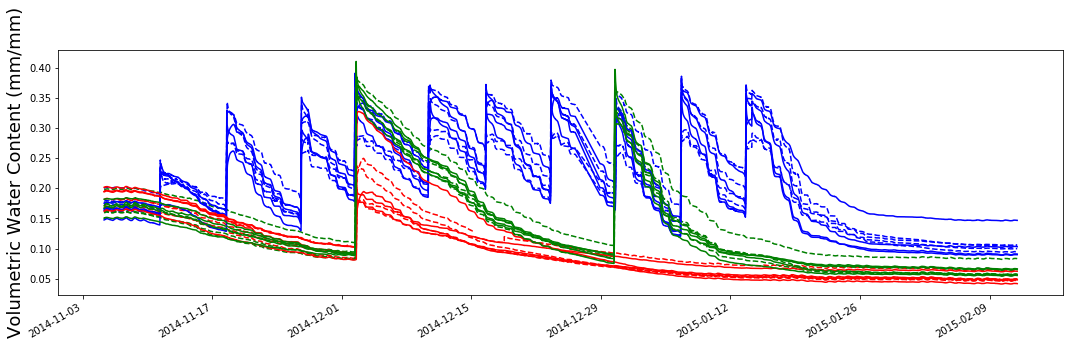

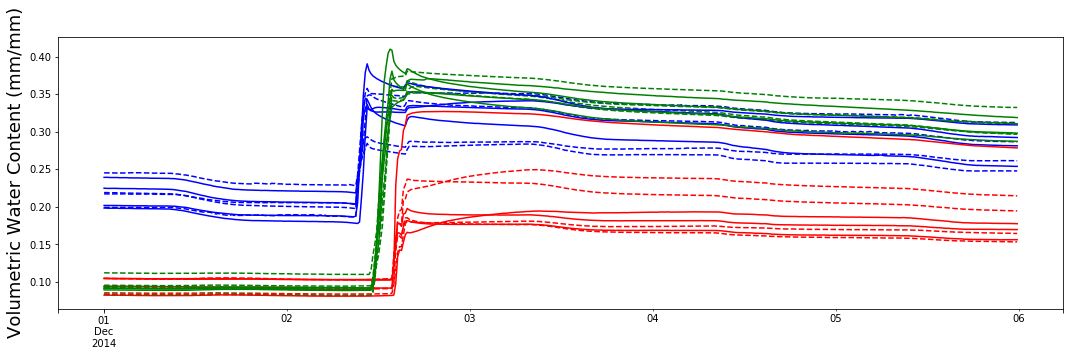

In [8]:
TopWater = np.add(SoilWaterData.loc[:'2015-02-11','D1B'].values,SoilWaterData.loc[:'2015-02-11','D1I'].values)
TopWater /=2
TopWater *= 1/BD

tup = ['TopWater']
NewIndex = pd.MultiIndex.from_product([tup,Cultivars,Irrigations,reps],names=['Measurement','Cultivar','Irrigation',''])
#NewIndex = NewIndex.droplevel(3)
TopWaterDF = pd.DataFrame(data = TopWater, index = SoilWaterData.loc[:'2015-02-11'].index, columns = NewIndex)

TopWaterDF.plot(figsize=(18,5),style=Styles, legend=False)
plt.ylabel('Volumetric Water Content (mm/mm)',fontsize=18)
TopWaterDF.loc['2014-12-1':'2014-12-5'].plot(figsize=(18,5),style=Styles, legend=False)
plt.ylabel('Volumetric Water Content (mm/mm)',fontsize=18)

# Calculate the specific heat capacity of soils

Text(0,0.5,'Soil Heat capacity (J/oc/kg)')

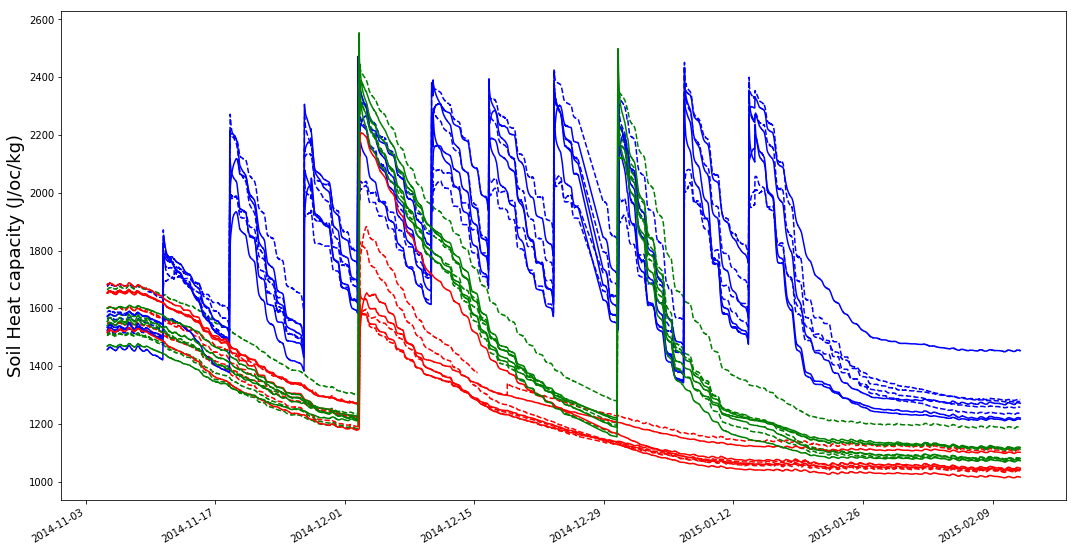

In [9]:
Cw = np.multiply(TopWater,CW)
Cs = np.add(Cw,CD)

tup = ['Cs']
NewIndex = pd.MultiIndex.from_product([tup,Cultivars,Irrigations,[1,2,3,4]],names=['Measurement','Cultivar','Irrigation',''])
NewIndex = NewIndex.droplevel(3)
CsDF = pd.DataFrame(data = Cs, index = SoilWaterData.index, columns = NewIndex)

CsDF.plot(figsize=(18,10),style=Styles, legend = False)
plt.ylabel('Soil Heat capacity (J/oc/kg)',fontsize=18)

## Calculate temperature deltas

Text(0,0.5,'Temperature Delta(oC)')

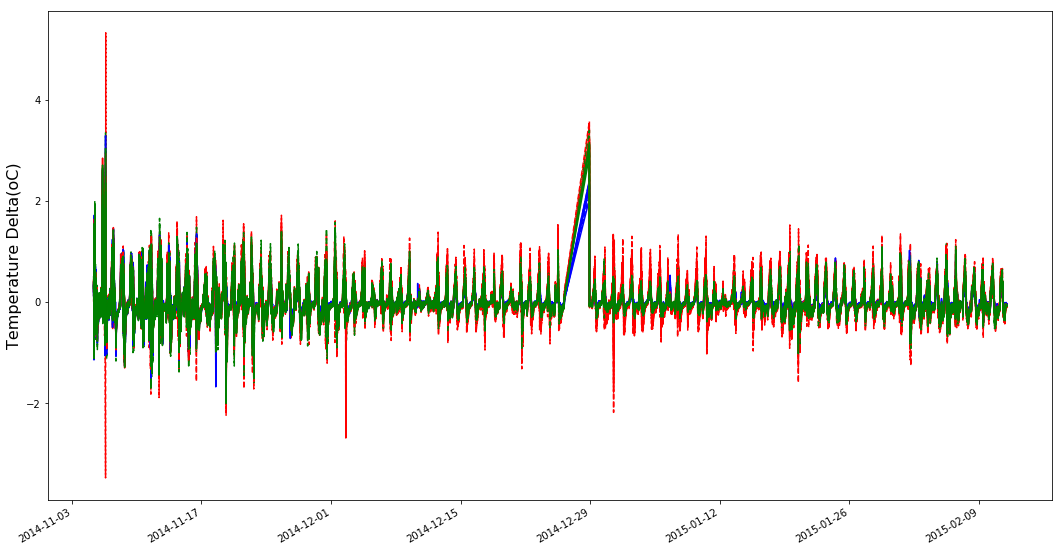

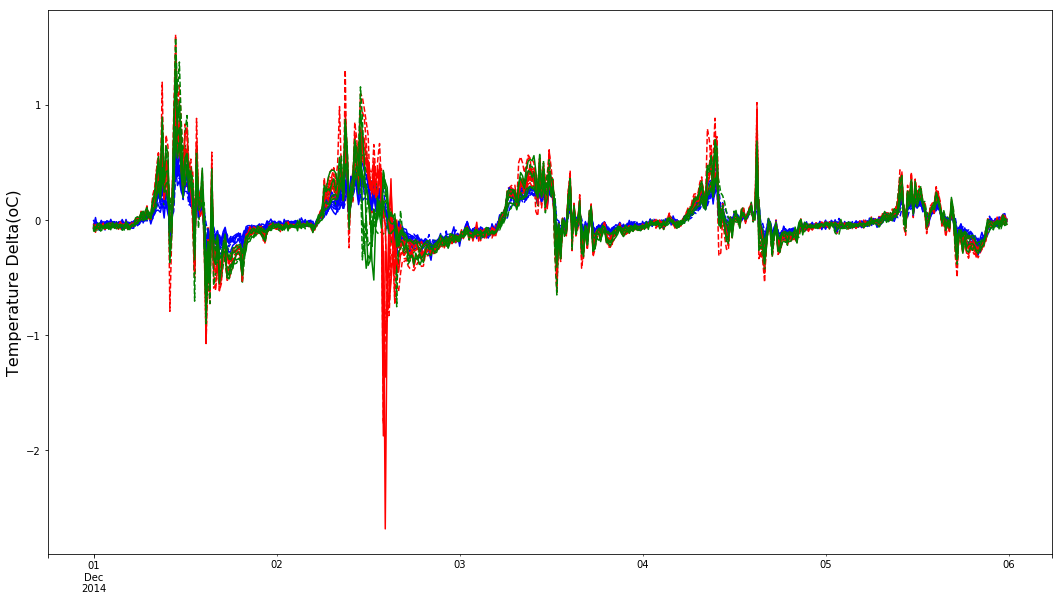

In [10]:
DeltaTemp = TopTempDF.diff()
DeltaTemp.plot(figsize=(18,10),style=Styles, legend = False)
plt.ylabel('Temperature Delta(oC)',fontsize=16)
DeltaTemp.loc['2014-12-1':'2014-12-5'].plot(figsize=(18,10),style=Styles, legend=False)
plt.ylabel('Temperature Delta(oC)',fontsize=16)

# Calculate energy stored in soil above heat flux plates

Text(0,0.5,'Top Layer Energy storage (MJ)')

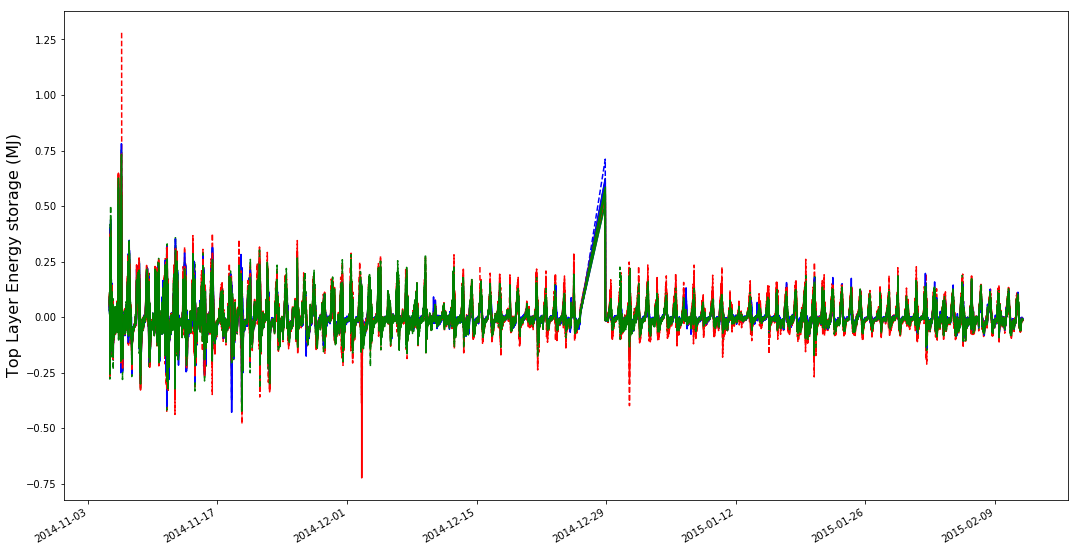

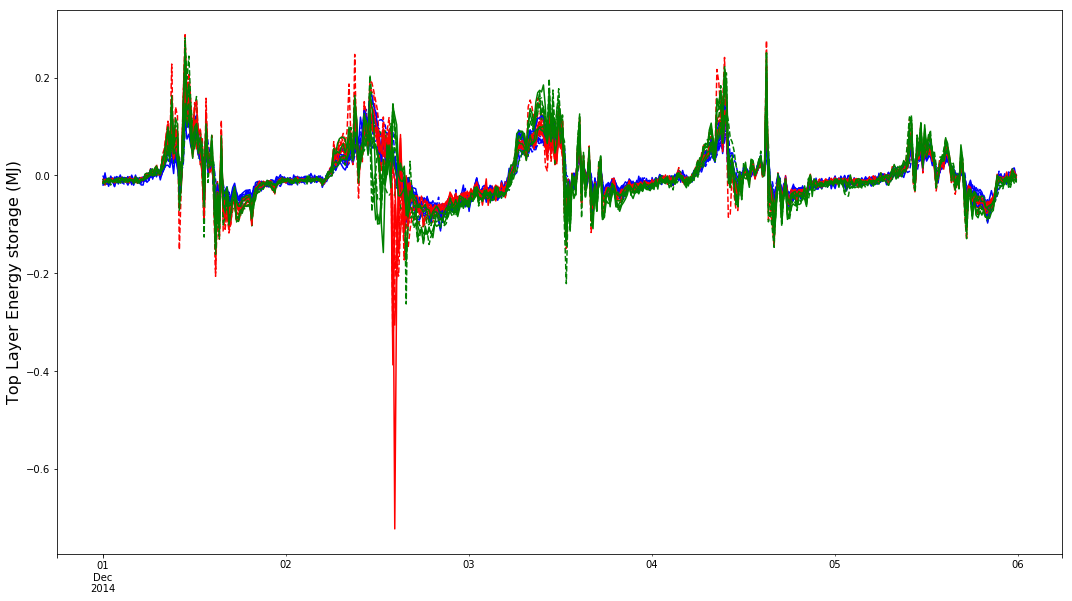

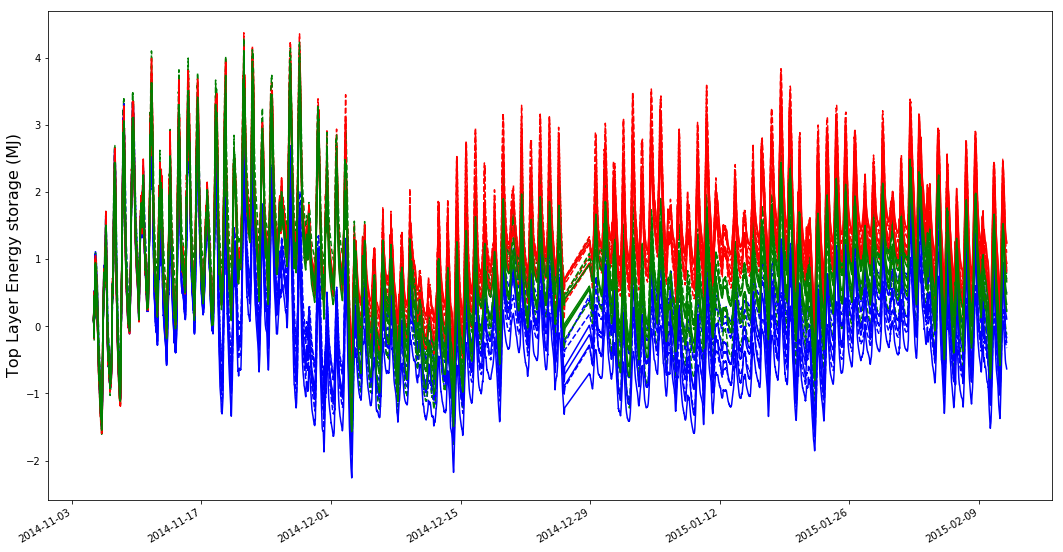

In [11]:
#Calculate the joules of energy stored in the soil per kg of soil
EnergyStored = np.multiply(DeltaTemp.values, CsDF.values) 
#Adjust for soil depth to give joules in the top 150 mm
EnergyStored = np.multiply(EnergyStored,150)
#Convert to MJ
EnergyStored = np.divide(EnergyStored,1000000)

tup = ['S']
NewIndex = pd.MultiIndex.from_product([tup,Cultivars,Irrigations,[1,2,3,4]],names=['Measurement','Cultivar','Irrigation',''])
TopEnergy = pd.DataFrame(data = EnergyStored, index = SoilWaterData.index, columns = NewIndex)

TopEnergy.plot(figsize=(18,10),style=Styles, legend=False)
plt.ylabel('Top Layer Energy storage (MJ)',fontsize=16)
TopEnergy.loc['2014-12-1':'2014-12-5'].plot(figsize=(18,10),style=Styles,legend=False)
plt.ylabel('Top Layer Energy storage (MJ)',fontsize=16)
TopEnergy.cumsum().plot(figsize=(18,10),style=Styles, legend=False)
plt.ylabel('Top Layer Energy storage (MJ)',fontsize=16)

### subset of plots where heat flux was measured

In [12]:
SoilHeat = TopEnergy.loc[:,[('S','Dash','High',1),('S','Dash','High',3),('S','Dash','High',4),
          ('S','Dash','Low',1),('S','Dash','Low',3),('S','Dash','Low',4),
          ('S','Omaka','High',1),('S','Omaka','High',3),('S','Omaka','High',4),
          ('S','Omaka','Low',1),('S','Omaka','Low',2),('S','Omaka','Low',4),]]

SoilHeat.columns = SoilHeat.columns.droplevel(3)

#Index dates when soil temp was measured
DateIndex = SoilHeat.index.tolist()

# Convert instantatious heat flux to Accumulated energy (W - MJ)

Text(0,0.5,'Deep Soil Heat Flux (MJ)')

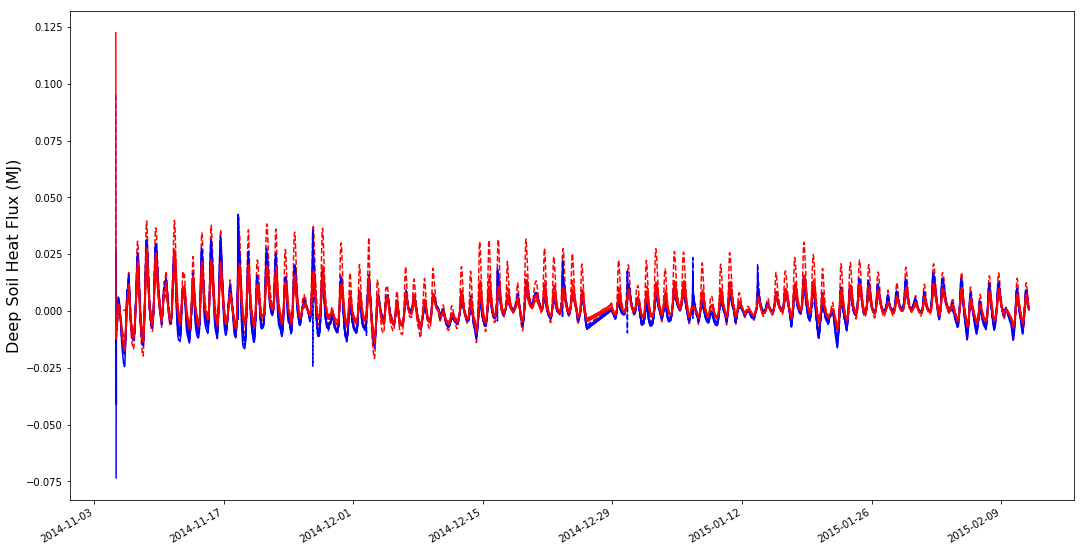

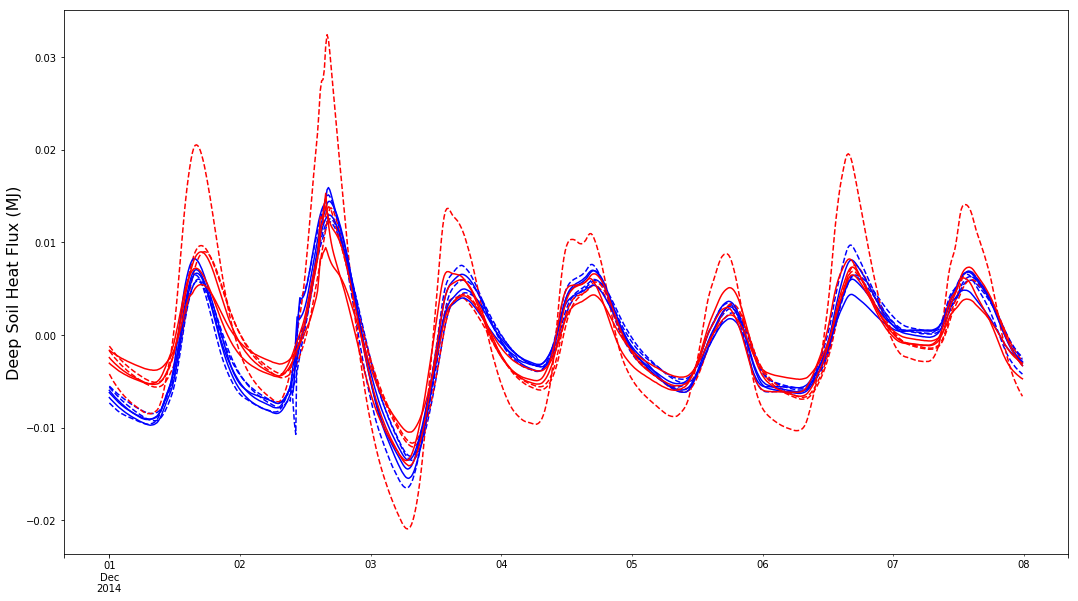

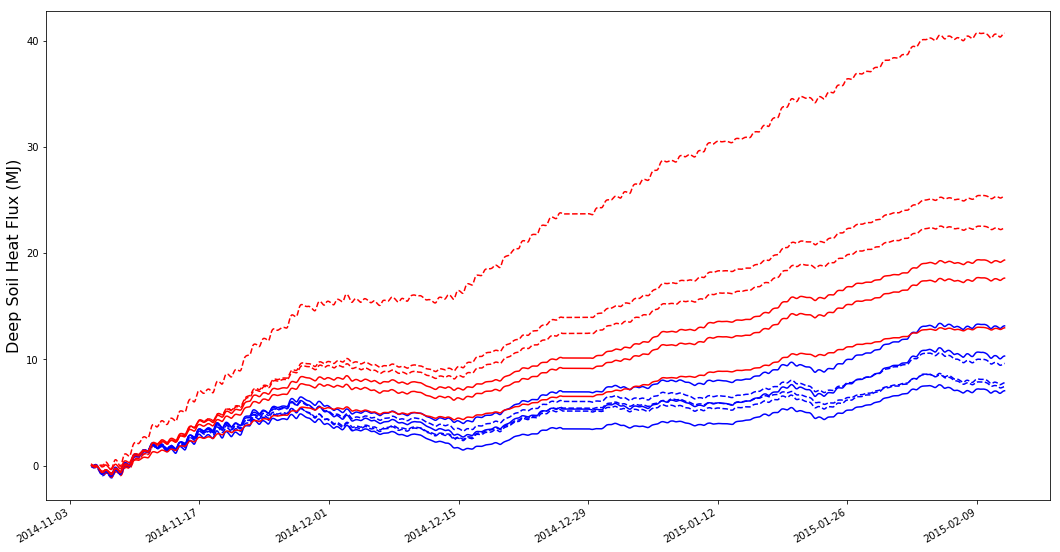

In [13]:
#Multiply by the duration of the measurement period to go from W/m2 to J/m2
HeatFluxMJ = np.multiply(Data.HeatFlux.loc[DateIndex,:].values,900)
#divide by a million to conver to JM
HeatFluxMJ = np.divide(HeatFluxMJ,1000000)

tup = ['HeatFluxMJ']
Irrigs = ['High','Low']
reps = [1,2,3]
NewIndex = pd.MultiIndex.from_product([tup,Cultivars,Irrigs,reps],names=['Measurement','Cultivar','Irrigation',''])
NewIndex = NewIndex.droplevel(3)
HeatFluxDF = pd.DataFrame(data = HeatFluxMJ, index = Data.loc[DateIndex,:].index, columns = NewIndex)

HeatFluxDF.plot(figsize=(18,10),style=Styles2, legend=False)
plt.ylabel('Deep Soil Heat Flux (MJ)',fontsize=16)
HeatFluxDF.loc['2014-12-1':'2014-12-7'].plot(figsize=(18,10),style=Styles2, legend=False)
plt.ylabel('Deep Soil Heat Flux (MJ)',fontsize=16)
HeatFluxDF.cumsum().plot(figsize=(18,10),style=Styles2, legend=False)
plt.ylabel('Deep Soil Heat Flux (MJ)',fontsize=16)

# Add the two heat fluxes together to give total heat flux to the soil

In [14]:
DaylightIndex = Data.IncomingRadnMJ.where(Data.IncomingRadnMJ>0.002)
DaylightIndex.dropna(inplace=True)
DaylightIndex = DaylightIndex.index.tolist()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or 

Text(0,0.5,'Soil Heat Flux (W/m2)')

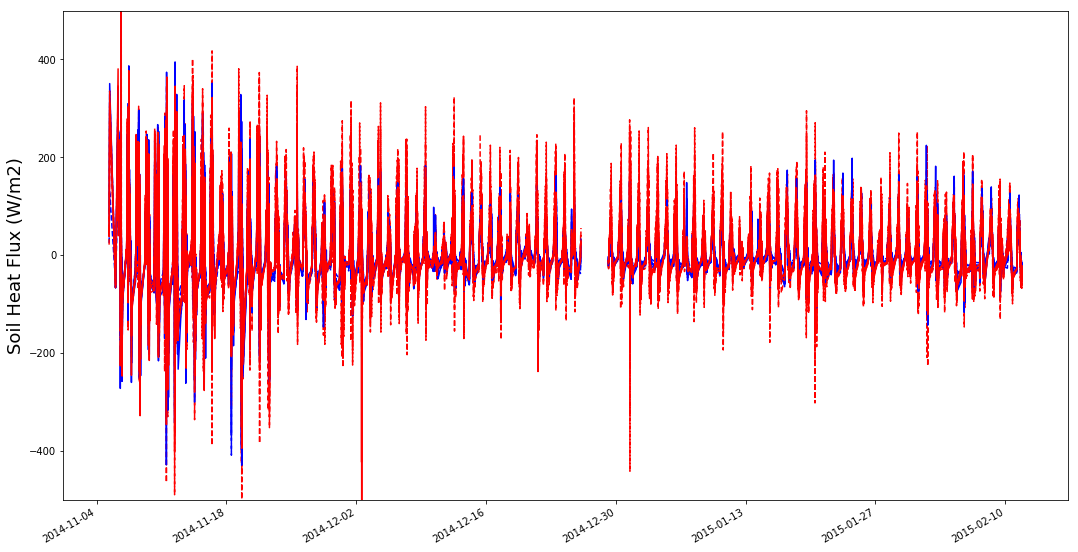

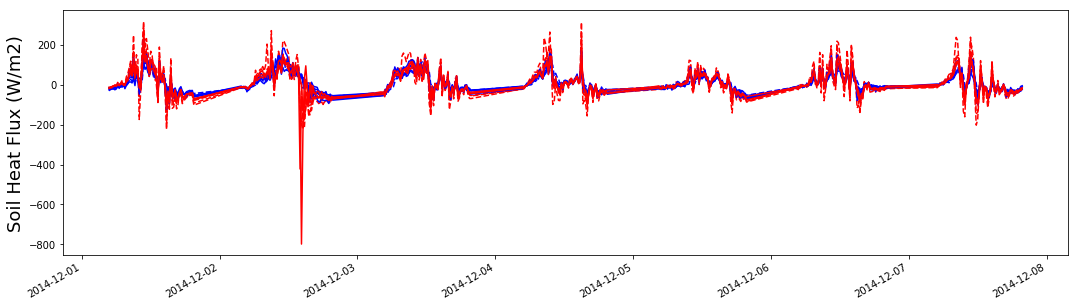

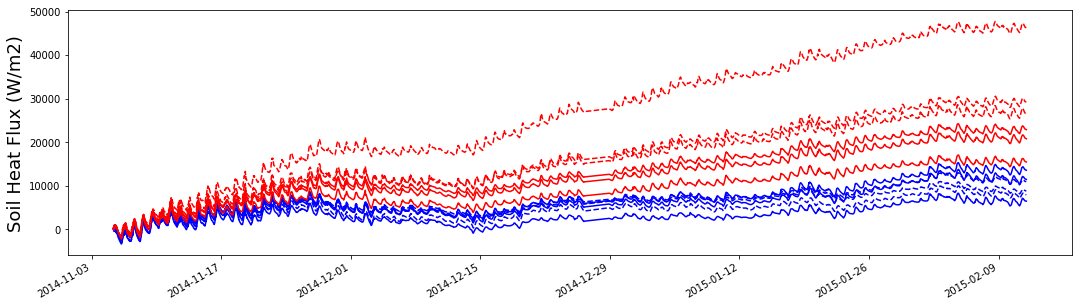

In [15]:
#Add total energy fluxes together
SoilHeatFluxMJ = np.add(HeatFluxDF.values,SoilHeat.values)
#Divide by the duration of the measurement period to make instanious (MJ/m2 to MW/m2)
SoilHeatFluxMW = np.divide(SoilHeatFluxMJ,900)
#Multiply by a million to go from MW/m2 to W/m2
SoilHeatFluxW = np.multiply(SoilHeatFluxMW,1000000)

IndexTups =  [('SoilHeat','Dash','High','1'),('SoilHeat','Dash','High','3'),('SoilHeat','Dash','High','4'),
          ('SoilHeat','Dash','Low','1'),('SoilHeat','Dash','Low','3'),('SoilHeat','Dash','Low','4'),
          ('SoilHeat','Omaka','High','1'),('SoilHeat','Omaka','High','3'),('SoilHeat','Omaka','High','4'),
          ('SoilHeat','Omaka','Low','1'),('SoilHeat','Omaka','Low','2'),('SoilHeat','Omaka','Low','4')]
NewIndex = pd.MultiIndex.from_tuples(IndexTups,names=['Var','Cultivar','Irrigation','Block'])
SoilHeatFluxMJ = pd.DataFrame(data = SoilHeatFluxMJ, index = Data.ix[DateIndex,:].index, columns = NewIndex)
SoilHeatFluxW = pd.DataFrame(data = SoilHeatFluxW, index = Data.ix[DateIndex,:].index, columns = NewIndex)

SoilHeatFluxW.ix[DaylightIndex,:].plot(figsize=(18,10),style=Styles2, legend=False)
plt.ylabel('Soil Heat Flux (W/m2)', fontsize = 18)
plt.ylim(-500,500)
SoilHeatFluxW.ix[DaylightIndex,:].ix['2014-12-1':'2014-12-7'].plot(figsize=(18,5),style=Styles2, legend=False)
plt.ylabel('Soil Heat Flux (W/m2)', fontsize = 18)
SoilHeatFluxW.cumsum().plot(figsize=(18,5),style=Styles2, legend=False)
plt.ylabel('Soil Heat Flux (W/m2)', fontsize = 18)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


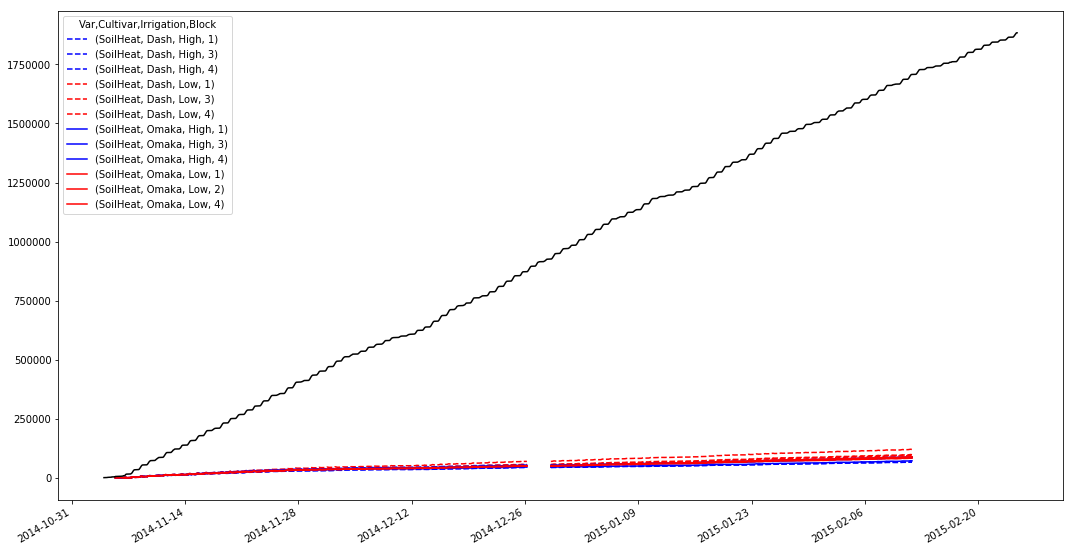

In [16]:
Styles = ['b--','b--','b--','r--','r--','r--',
          'b-','b-','b-','r-','r-','r-']
SoilHeatFluxW.loc[DaylightIndex,:].cumsum().plot(figsize=(18,10),style=Styles)
#Plot incoming net radiation (taking total radiation, converting to W and multiplying by 0.66 to give net radn)
plt.plot(Data.IncomingRadnKW.loc[DaylightIndex].index,Data.IncomingRadnKW.loc[DaylightIndex].multiply(1000*0.66).cumsum(),'-',color='k',label='Incomming Radn')

# Relative to incoming energy, Soil heat flux is quite small over the duration of the experiment

In [17]:
SoilHeatFluxW.columns = SoilHeatFluxW.columns.droplevel('Var')

In [18]:
SoilHeatFluxW.index.name = 'Date'
SoilHeatFluxWLong = SoilHeatFluxW.resample('h').mean().unstack()
SoilHeatFluxWLong.name = 'G'
SoilHeatFluxWLong.to_pickle('.\DataFrames\HourlySoilHeatFluxTotalW.pkl')
#SoilHeatFluxMJ.resample('h').sum().to_pickle('.\DataFrames\HourlySoilHeatFluxTotalMJ.pkl')

NightIndex = SoilHeatFluxW.index.indexer_between_time(datetime.time(23),
                    datetime.time(4))
SoilHeatFluxW.iloc[NightIndex,:].resample('h').mean().to_pickle('.\DataFrames\HourlySoilHeatFluxDarkW.pkl')
SoilHeatFluxMJ.iloc[NightIndex,:].resample('h').sum().to_pickle('.\DataFrames\HourlySoilHeatFluxDarkMJ.pkl')
SoilHeatFluxMJ.iloc[NightIndex,:].resample('h').sum().divide(2.4).to_pickle('.\DataFrames\HourlySoilHeatFluxDark_mm.pkl')

In [19]:
SoilHeatFluxMJ.index.name='Date'
SoilHeatFluxMJ.columns = SoilHeatFluxMJ.columns.droplevel('Var')
SoilHeatFluxMJLong = SoilHeatFluxMJ.resample('h').sum().unstack()
SoilHeatFluxMJLong.name = 'G'
SoilHeatFluxMJLong.to_pickle('.\DataFrames\HourlySoilHeatFluxTotalMJ.pkl')

# Look at soil heaf flux relative to incomming radiation

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


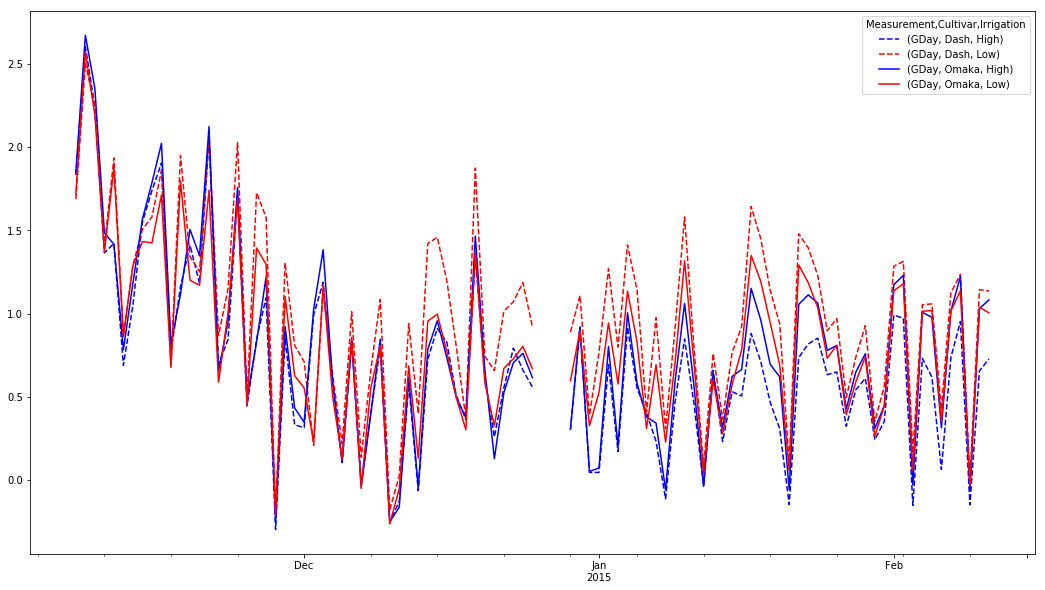

In [20]:
SoilHeatFluxMJMeans = SoilHeatFluxMJ.groupby(level=['Cultivar','Irrigation'],axis=1).mean()
SoilHeatFluxMJDaylightMeans = SoilHeatFluxMJMeans.loc[DaylightIndex,:].resample('24h',base=6).sum()
SoilHeatFluxMJDaylightMeans.index = SoilHeatFluxMJDaylightMeans.index.normalize()
IncommingRadnDaylight = Data.IncomingRadnMJ.loc[DateIndex,:].loc[DaylightIndex,:].resample('24h',base=6).sum() 
IncommingRadnDaylight.index = IncommingRadnDaylight.index.normalize()

GDay = SoilHeatFluxMJDaylightMeans.values

tup = ['GDay']
Irrigs = ['High','Low']
reps = [1,2,3]
NewIndex = pd.MultiIndex.from_product([tup,Cultivars,Irrigs],names=['Measurement','Cultivar','Irrigation'])
GDayDF = pd.DataFrame(data = GDay, index = IncommingRadnDaylight.index, columns = NewIndex)
GDayDF.loc[pd.to_datetime(['2014-12-26 00:00:00',
                           '2014-12-27 00:00:00',
                           '2014-12-28 00:00:00',
                           '2015-02-12 00:00:00',
                           '2015-02-13 00:00:00',
                            '2015-02-14 00:00:00',
                            '2015-02-15 00:00:00',
                            '2015-02-16 00:00:00',
                            '2015-02-17 00:00:00',
                            '2015-02-18 00:00:00',
                            '2015-02-19 00:00:00',
                            '2015-02-20 00:00:00',
                            '2015-02-21 00:00:00',
                            '2015-02-22 00:00:00',
                            '2015-02-23 00:00:00',
                            '2015-02-24 00:00:00']),:] = np.nan
GDayDF.loc['2014-11-07':].plot(figsize=(18,10),style=['b--','r--','b-','r-'])
#GDayDF.loc['2014-12-1':'2014-12-7'].groupby(level=['Cultivar','Irrigation'],axis=1).mean().plot(figsize=(18,10),style=['b--','r--','b-','r-'])

### Bring in radiation interception data

In [21]:
CoverData = pd.read_pickle('.\DataFrames\DailyFPARTot.pkl')
CoverDataMeans = CoverData.groupby(level=('Cultivar','Irrigation'),axis=1).mean()

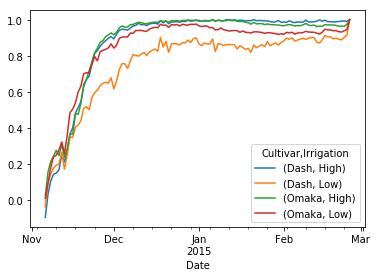

In [22]:
CoverDataMeans.plot()

## Make a data frame for comparing GRn with other variables

In [23]:
def SliceFullPlots(CompleteData,Variable):
    Chunk = CompleteData.loc[:,Variable]
    NewIndex = pd.MultiIndex.from_product([Cultivars,['Low','Mid','High'],[1,2,3,4]],names=['Cultivar','Irrigation',''])
    Chunk.columns = NewIndex
    SubIndex = pd.MultiIndex.from_product([Cultivars,['Low','High'],[1,3,4]],names=['Cultivar','Irrigation',''])
    SubChunk = Chunk.loc[DaylightIndex,SubIndex]
    SubChunkGroup = SubChunk.groupby(level=('Cultivar','Irrigation'), axis=1).mean()
    SubChunkAgregate = SubChunkGroup.resample('24h',base=6).mean()
    SubChunkAgregate.index = SubChunkAgregate.index.normalize()
    SubChunkUnstack = SubChunkAgregate.unstack()
    return SubChunkUnstack
    

In [24]:
LongG = GDayDF.loc[:,('GDay')].unstack(0)
LongData = pd.DataFrame(LongG, columns = ['GDay'])
for cul in Cultivars:
    for irr in IrrigationsShort:
        LongData.loc[(cul,irr),'AirTemperature'] = Data.loc[DaylightIndex,'AirTemperature'].resample('24h',base=6).mean().values
        LongData.loc[(cul,irr),'RelativeHumidity'] = Data.loc[DaylightIndex,'RelativeHumidity'].resample('24h',base=6).mean().values
        LongData.loc[(cul,irr),'Windspeed'] = Data.loc[DaylightIndex,'Windspeed'].resample('24h',base=6).mean().values
        LongData.loc[(cul,irr),'IncomingRadnMJ'] = Data.loc[DaylightIndex,'IncomingRadnMJ'].resample('24h',base=6).sum().values

LongData.loc[:,'fPAR'] = CoverData.groupby(level=['Cultivar','Irrigation'],axis=1).mean().unstack()
LongData.loc[:,'SurfaceSoilTemp'] = SliceFullPlots(Data,'SurfaceSoilTemp')
LongData.loc[:,'TempAirSoil1Diff'] = LongData.loc[:,'AirTemperature'] - SliceFullPlots(Data,'SurfaceSoilTemp') 
SubIndex = pd.MultiIndex.from_product([['TopTemp'],Cultivars,['Low','High'],[1,3,4]],names=['Measurement','Cultivar','Irrigation',''])
Temp = TopTempDF.loc[DaylightIndex,SubIndex].groupby(level=('Cultivar','Irrigation'),axis=1).mean().resample('24h',base=6).mean()
Temp.index = Temp.index.normalize()
LongData.loc[:,'SoilTemp15'] = Temp.unstack()
LongData.loc[:,'TempAirSoil15Diff'] = LongData.loc[:,'AirTemperature'] - LongData.loc[:,'SoilTemp15'] 
SubIndex = pd.MultiIndex.from_product([['TopWater'],Cultivars,['Low','High'],[1,3,4]],names=['Measurement','Cultivar','Irrigation',''])
Temp = TopWaterDF.loc[DaylightIndex,SubIndex].groupby(level=('Cultivar','Irrigation'),axis=1).mean().resample('24h',base=6).mean()
Temp.index = Temp.index.normalize()
LongData.loc[:,'SoilWater'] = Temp.unstack()
LongData.loc[:,'SoilRad'] = LongData.loc[:,'IncomingRadnMJ']* (1-LongData.loc[:,'fPAR'])

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


## Look at heat flux against different variables

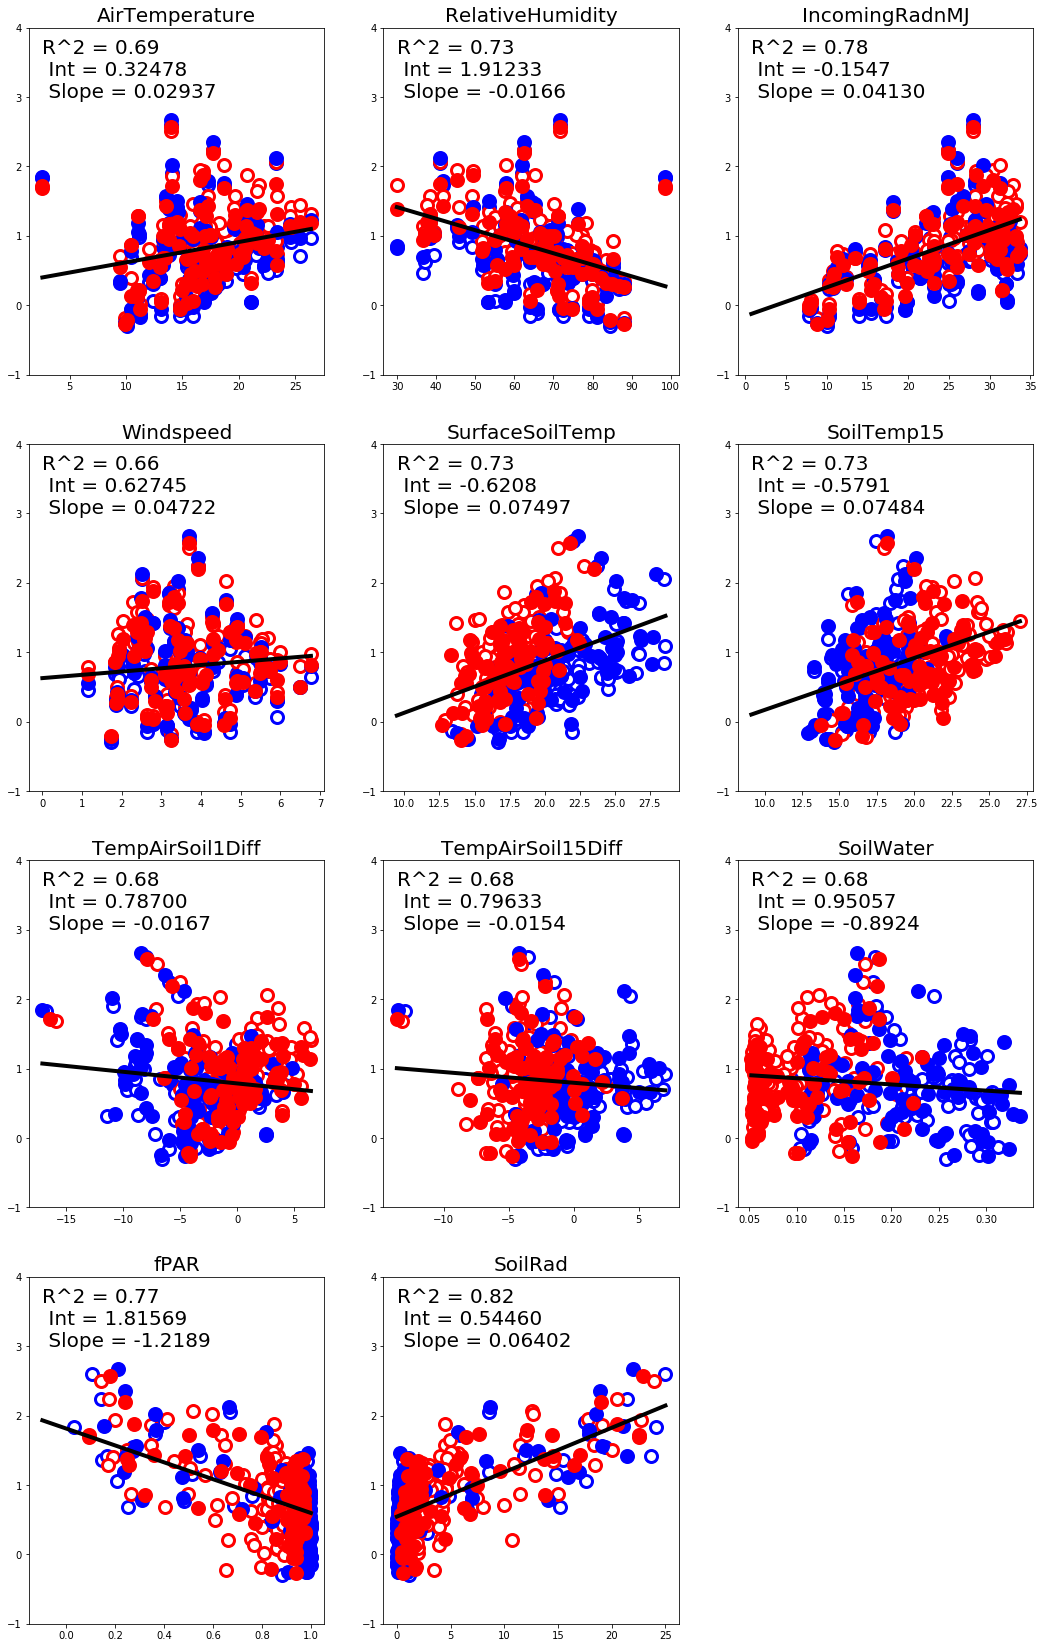

<Figure size 1296x720 with 0 Axes>

In [25]:
Graph = plt.figure(figsize=(18,60))
start = '2014-12-10'
end = '2015-02-10'
plt.figure(figsize=(18,10))
ecols = ['b','r','b','r']
fcols = ['w','w','b','r']
Irrigations = ['High','Low']
pannel = 1
Descriptors = ['AirTemperature','RelativeHumidity','IncomingRadnMJ',
               'Windspeed','SurfaceSoilTemp','SoilTemp15','TempAirSoil1Diff',
               'TempAirSoil15Diff','SoilWater','fPAR','SoilRad']
for des in Descriptors:
    DailyDescriptor = LongData.loc[:,des]
    fig = Graph.add_subplot(8,3,pannel)
    pos = 0
    for cul in Cultivars:
        for irr in Irrigations:
            fig.plot(LongData.loc[(cul,irr),des].loc['2014-11-07':],
                LongData.loc[(cul,irr),'GDay'].loc['2014-11-07':],
                     'o',mec=ecols[pos],mfc=fcols[pos],mew = 3, markersize = 12,)
            pos+=1  
    
    X = LongData.loc[:,LongData.columns.isin([des])].loc['2014-11-07':]
    Y = LongData.loc[:,'GDay'].loc['2014-11-07':]
    ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                            sm.add_constant(X), # X variable
                                            missing='drop',                                     # ignor and data where one value is missing
                                            hasconst=False) 
    Regres = ModTemp.fit(); 
    Xs = []
    Xs.append(X.min())
    Xs.append(X.max())
    Ys = []
    Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
    Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
    fig.plot(Xs,Ys,'-', linewidth = 4, color='k')
    fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
    fig.text(X.min(),3,fitR2,fontsize=20)
    fig.set_ylim(-1,4)
    fig.set_title(des, fontsize = 20)
    pannel +=1

## Look at G as a proportion of incomming radn

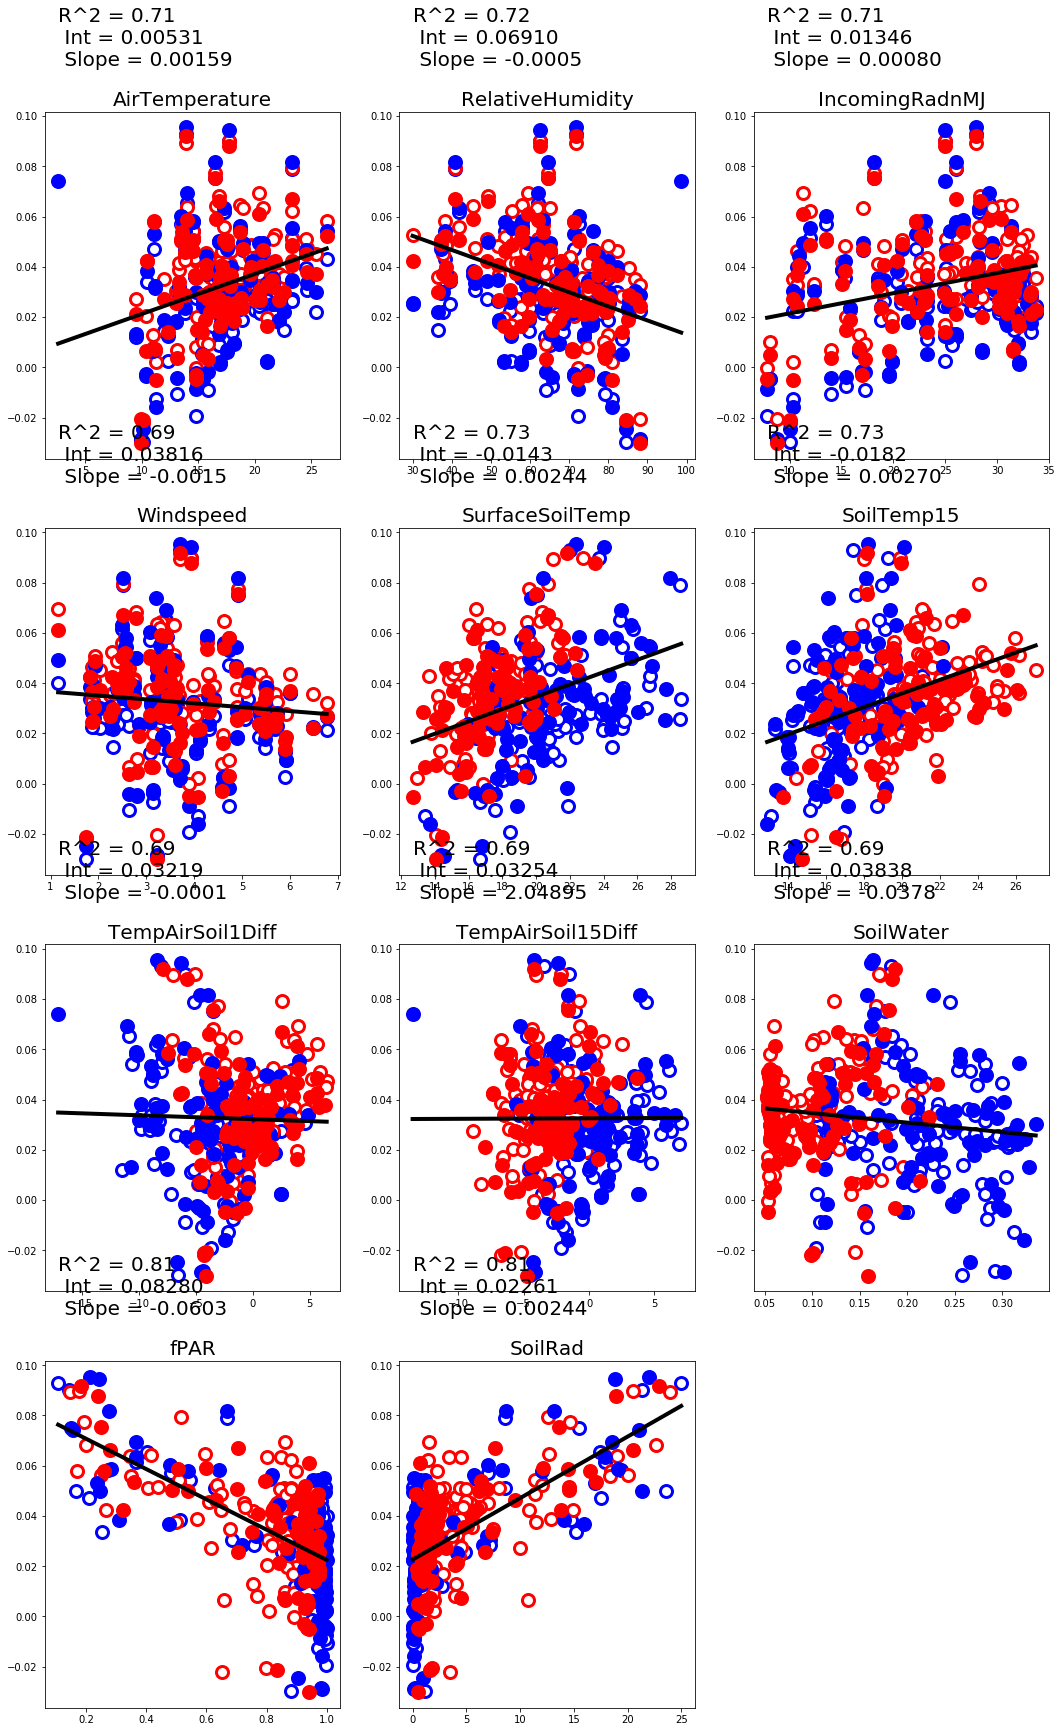

<Figure size 1296x720 with 0 Axes>

In [26]:
Graph = plt.figure(figsize=(18,60))
start = '2014-12-10'
end = '2015-02-10'
plt.figure(figsize=(18,10))
ecols = ['b','r','b','r']
fcols = ['w','w','b','r']
Irrigations = ['High','Low']
pannel = 1
Descriptors = ['AirTemperature','RelativeHumidity','IncomingRadnMJ',
               'Windspeed','SurfaceSoilTemp','SoilTemp15','TempAirSoil1Diff',
               'TempAirSoil15Diff','SoilWater','fPAR','SoilRad']
for des in Descriptors:
    DailyDescriptor = LongData.loc[:,des]
    fig = Graph.add_subplot(8,3,pannel)
    pos = 0
    for cul in Cultivars:
        for irr in Irrigations:
            FullCover = LongData.loc[(cul,irr),'fPAR'].loc['2014-11-07':]>0.1
            fig.plot(LongData.loc[(cul,irr),des].loc['2014-11-07':].loc[FullCover],
                LongData.loc[(cul,irr),'GDay'].loc['2014-11-07':].loc[FullCover]/LongData.loc[(cul,irr),'IncomingRadnMJ'].loc['2014-11-07':].loc[FullCover],
                     'o',mec=ecols[pos],mfc=fcols[pos],mew = 3, markersize = 12,)
            pos+=1  
    
    TrialDates = LongData.loc[:,LongData.columns.isin([des])].index.get_level_values(2)>'2014-11-06'
    FullCover = LongData.loc[:,'fPAR'].loc[TrialDates] >0.1
    X = LongData.loc[:,LongData.columns.isin([des])].loc[TrialDates].loc[FullCover]
    Y = LongData.loc[:,'GDay'].loc[TrialDates].loc[FullCover]/LongData.loc[:,'IncomingRadnMJ'].loc[TrialDates].loc[FullCover]
    ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                            sm.add_constant(X), # X variable
                                            missing='drop',                                     # ignor and data where one value is missing
                                            hasconst=False) 
    Regres = ModTemp.fit(); 
    Xs = []
    Xs.append(X.min())
    Xs.append(X.max())
    Ys = []
    Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
    Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
    fig.plot(Xs,Ys,'-', linewidth = 4, color='k')
    fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
    fig.text(X.min(),0.12,fitR2,fontsize=20)
    #fig.set_ylim(-1,4)
    fig.set_title(des, fontsize = 20)
    pannel +=1

## Clear effect of fPAR.  Lets look at the other variables where fPAR close to full cover

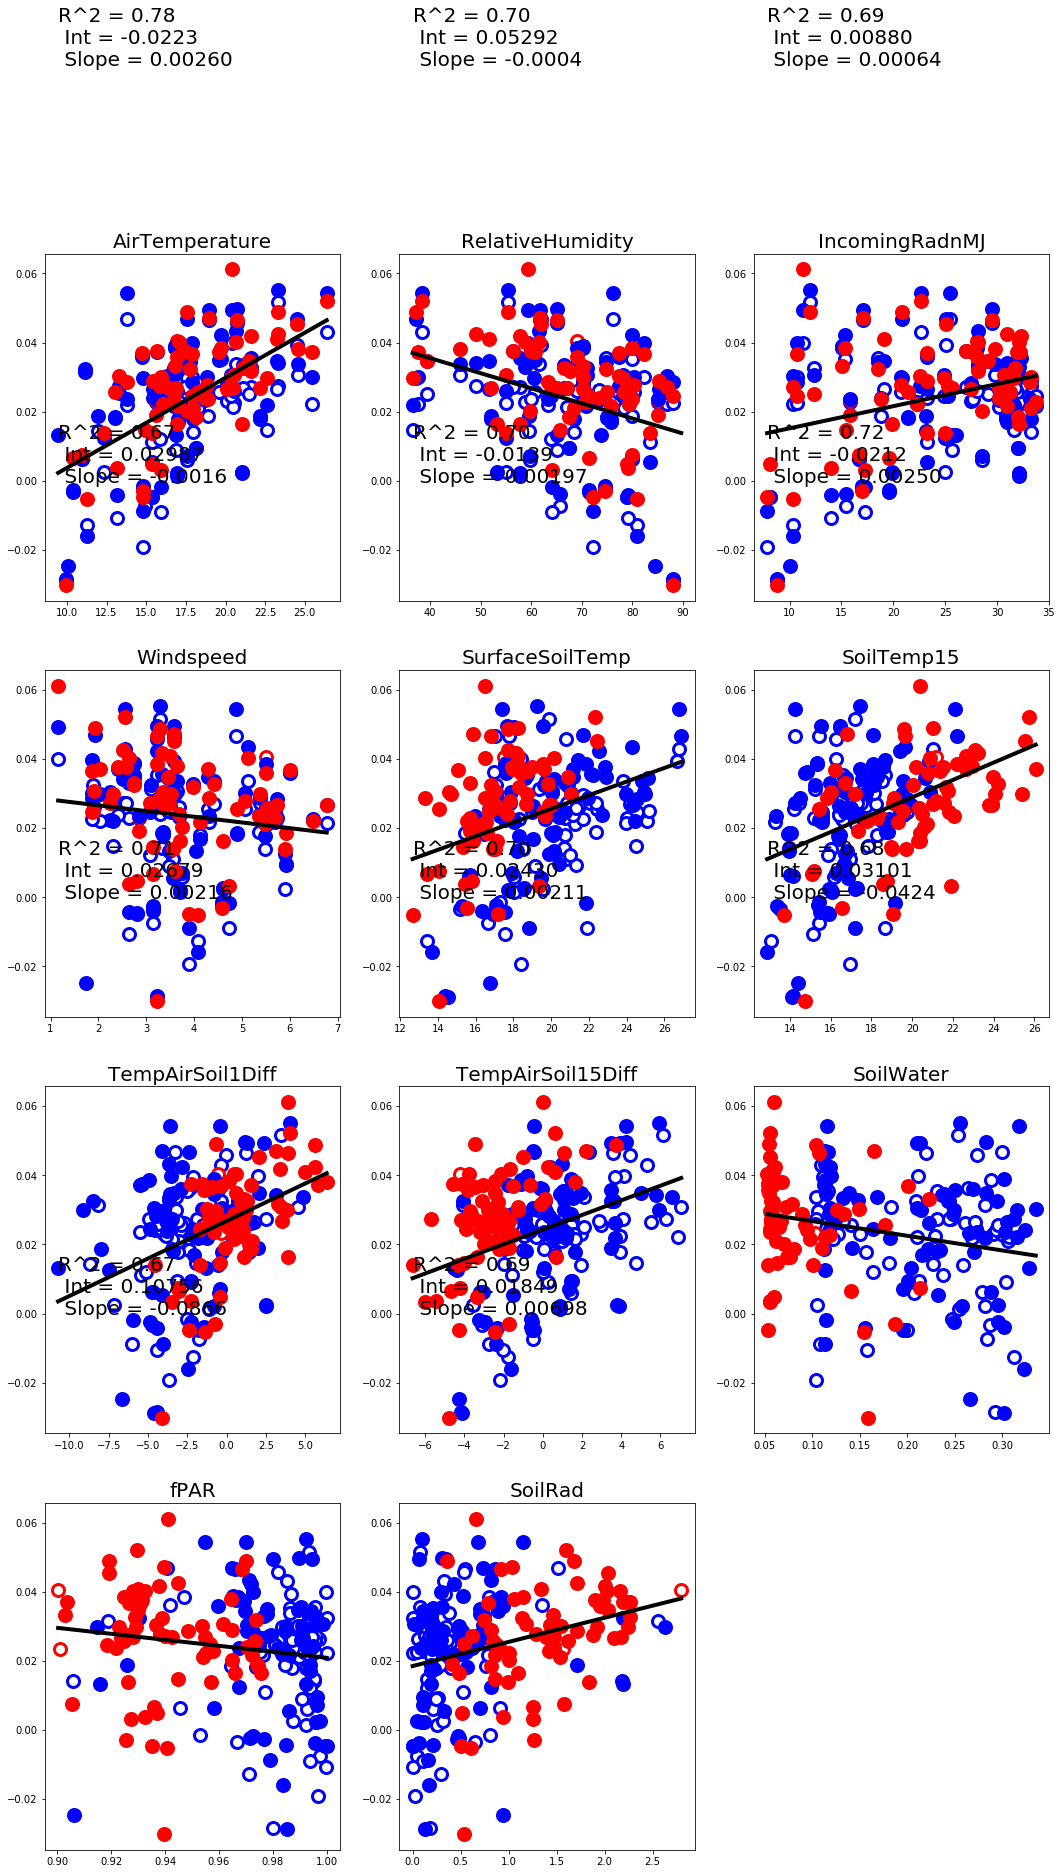

<Figure size 1296x720 with 0 Axes>

In [27]:
Graph = plt.figure(figsize=(18,60))
start = '2014-12-10'
end = '2015-02-10'
plt.figure(figsize=(18,10))
ecols = ['b','r','b','r']
fcols = ['w','w','b','r']
Irrigations = ['High','Low']
pannel = 1
Descriptors = ['AirTemperature','RelativeHumidity','IncomingRadnMJ',
               'Windspeed','SurfaceSoilTemp','SoilTemp15','TempAirSoil1Diff',
               'TempAirSoil15Diff','SoilWater','fPAR','SoilRad']
for des in Descriptors:
    DailyDescriptor = LongData.loc[:,des]
    fig = Graph.add_subplot(8,3,pannel)
    pos = 0
    for cul in Cultivars:
        for irr in Irrigations:
            FullCover = LongData.loc[(cul,irr),'fPAR'].loc['2014-11-07':]>0.9
            fig.plot(LongData.loc[(cul,irr),des].loc['2014-11-07':].loc[FullCover],
                LongData.loc[(cul,irr),'GDay'].loc['2014-11-07':].loc[FullCover]/LongData.loc[(cul,irr),'IncomingRadnMJ'].loc['2014-11-07':].loc[FullCover],
                     'o',mec=ecols[pos],mfc=fcols[pos],mew = 3, markersize = 12,)
            pos+=1  
    
    TrialDates = LongData.loc[:,LongData.columns.isin([des])].index.get_level_values(2)>'2014-11-06'
    FullCover = LongData.loc[:,'fPAR'].loc[TrialDates] >0.9
    X = LongData.loc[:,LongData.columns.isin([des])].loc[TrialDates].loc[FullCover]
    Y = LongData.loc[:,'GDay'].loc[TrialDates].loc[FullCover]/LongData.loc[:,'IncomingRadnMJ'].loc[TrialDates].loc[FullCover]
    ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                            sm.add_constant(X), # X variable
                                            missing='drop',                                     # ignor and data where one value is missing
                                            hasconst=False) 
    Regres = ModTemp.fit(); 
    Xs = []
    Xs.append(X.min())
    Xs.append(X.max())
    Ys = []
    Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
    Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
    fig.plot(Xs,Ys,'-', linewidth = 4, color='k')
    fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
    fig.text(X.min(),0.12,fitR2,fontsize=20)
    #fig.set_ylim(-1,4)
    fig.set_title(des, fontsize = 20)
    pannel +=1

## The best descriprors are fPAR, AirTemp and Humidity

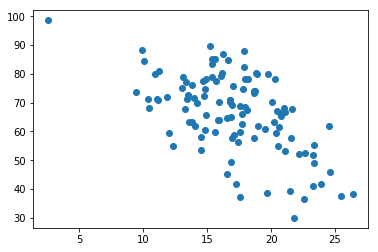

In [28]:
plt.plot(LongData.loc[(cul,irr),'AirTemperature'],
        LongData.loc[(cul,irr),'RelativeHumidity'],'o')

In [29]:
X = LongData.loc[(cul,irr),'AirTemperature']
Y = LongData.loc[(cul,irr),'RelativeHumidity']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       RelativeHumidity   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1963.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           1.26e-85
Time:                        11:31:11   Log-Likelihood:                -420.58
No. Observations:                 110   AIC:                             845.2
Df Residuals:                     108   BIC:                             850.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             99.6688      4.713     21.147      0.000      90.327     109.011
AirTemperature    -1.9526      0.269     -7.267      0.000      -2.485      -1.420
==============================================================================
Omnibus:                        1.750   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.802
Skew:                          -0.283   Prob(JB):                        0.406
Kurtosis:                       2.731   Cond. No.                         77.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Air temperature and relative humidity are highly correlated so lets forget about humidity as air temperature is easier to deal with in a practical situation

## How much of the variation can AirTemp and fPAR account for on their own.

In [30]:
LongData.index.get_level_values(2)

DatetimeIndex(['2014-11-03', '2014-11-04', '2014-11-05', '2014-11-06',
               '2014-11-07', '2014-11-08', '2014-11-09', '2014-11-10',
               '2014-11-11', '2014-11-12',
               ...
               '2015-02-15', '2015-02-16', '2015-02-17', '2015-02-18',
               '2015-02-19', '2015-02-20', '2015-02-21', '2015-02-22',
               '2015-02-23', '2015-02-24'],
              dtype='datetime64[ns]', length=456, freq='D')

In [31]:
Descriptors = ['AirTemperature','RelativeHumidity','IncomingRadnMJ','Windspeed',
              'SurfaceSoilTemp','SoilTemp15','TempAirSoil1Diff',
               'TempAirSoil15Diff','SoilWater','fPAR','SoilRad']
TrialDates = LongData.index.get_level_values(2)>'2014-11-06'
X = LongData.loc[:,LongData.columns.isin(Descriptors)].loc[TrialDates]
Y = LongData.loc[:,'GDay'].loc[TrialDates]
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GDay   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     513.4
Date:                Fri, 30 Aug 2019   Prob (F-statistic):          1.58e-208
Time:                        11:31:11   Log-Likelihood:                -22.418
No. Observations:                 376   AIC:                             64.84
Df Residuals:                     366   BIC:                             104.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0633      0.339     -3.136      0.002      -1.730      -0.397
AirTemperature        0.0270      0.002     11.040      0.000       0.022       0.032
RelativeHumidity      0.0060      0.002      3.885      0.000       0.003       0.009
Windspeed            -0.0396      0.013     -3.008      0.003      -0.065      -0.014
IncomingRadnMJ        0.0300      0.003     10.870      0.000       0.025       0.035
fPAR                  0.1623      0.311      0.523      0.602      -0.448       0.773
SurfaceSoilTemp       0.0098      0.003      3.138      0.002       0.004       0.016
TempAirSoil1Diff      0.0172      0.003      5.900      0.000       0.011       0.023
SoilTemp15           -0.0004      0.006     -0.058      0.954      -0.013       0.012
TempAirSoil15Diff     0.0273      0.006      4.824      0.000       0.016       0.038
SoilWater            -0.7274      0.317     -2.295      0.022      -1.351      -0.104
SoilRad               0.0842      0.013      6.490      0.000       0.059       0.110
==============================================================================
Omnibus:                       11.032   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               20.025
Skew:                          -0.107   Prob(JB):                     4.48e-05
Kurtosis:                       4.110   Cond. No.                     1.51e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.91e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [32]:
Descriptors = ['AirTemperature',
               'IncomingRadnMJ',
               'fPAR']
TrialDates = LongData.index.get_level_values(2)>'2014-11-06'
X = LongData.loc[:,LongData.columns.isin(Descriptors)].loc[TrialDates]
Y = LongData.loc[:,'GDay'].loc[TrialDates]
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GDay   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1113.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):          1.76e-205
Time:                        11:31:11   Log-Likelihood:                -50.145
No. Observations:                 376   AIC:                             108.3
Df Residuals:                     372   BIC:                             124.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6561      0.078      8.360      0.000       0.502       0.810
AirTemperature     0.0500      0.004     12.485      0.000       0.042       0.058
IncomingRadnMJ     0.0318      0.002     15.406      0.000       0.028       0.036
fPAR              -1.7375      0.067    -25.908      0.000      -1.869      -1.606
==============================================================================
Omnibus:                        1.916   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.791
Skew:                          -0.053   Prob(JB):                        0.408
Kurtosis:                       3.321   Cond. No.                         187.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
Descriptors = ['AirTemperature',
               'SoilRad']
TrialDates = LongData.index.get_level_values(2)>'2014-11-06'
X = LongData.loc[:,LongData.columns.isin(Descriptors)].loc[TrialDates]
Y = LongData.loc[:,'GDay'].loc[TrialDates]
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GDay   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1161.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):          9.80e-189
Time:                        11:31:11   Log-Likelihood:                -92.791
No. Observations:                 376   AIC:                             191.6
Df Residuals:                     373   BIC:                             203.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6319      0.077     -8.216      0.000      -0.783      -0.481
AirTemperature     0.0659      0.004     15.850      0.000       0.058       0.074
SoilRad            0.0801      0.003     28.119      0.000       0.074       0.086
==============================================================================
Omnibus:                        2.260   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                2.207
Skew:                           0.187   Prob(JB):                        0.332
Kurtosis:                       2.981   Cond. No.                         86.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## R^2 of 0.93 with Radiation and fPAR and AirTemp and 0.931 with all others included.  No need to include the others!!!

In [34]:
#Formulation for original paper
# def estGDay(Radn, fPAR, AirTemp):
#     Const = 0.6306 
#     RadEff = np.multiply(Radn.values,0.0906)
#     fPAREff = np.multiply(fPAR, -1.733)
#     AirTempEff = np.multiply(AirTemp.values,0.0556)
#     return Const + RadEff + fPAREff + AirTempEff 
#reformulated to use soil rad instead of Radn and fPAR
# def estGDay(SoilRadn, AirTemp):
#     Const = -0.7091
#     SoilRadEff = np.multiply(SoilRadn.values,0.2149)
#     AirTempEff = np.multiply(AirTemp.values,0.0736)
#     return Const + SoilRadEff  + AirTempEff 

# For some reason (posibly not cleaning junk values on first few days) the coeffeicnets
# above are wrong.  Values from rerun analysis
def estGDay(SoilRadn, AirTemp):
    Const = -0.6319
    SoilRadEff = np.multiply(SoilRadn.values,0.0801)
    AirTempEff = np.multiply(AirTemp.values,0.0659)
    return Const + SoilRadEff  + AirTempEff 

In [35]:
LongData.loc[:,'EstGDayMJ'] = estGDay(LongData.loc[:,'SoilRad'],
                                     LongData.loc[:,'AirTemperature'])

Text(0.0345506,2,'R^2 = 0.90\n Int = 0.00093\n Slope = 0.99958')

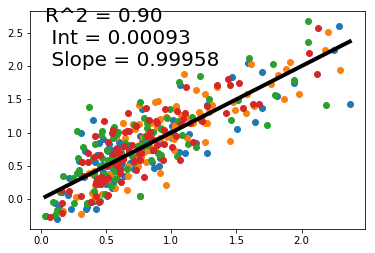

In [36]:
for cul in Cultivars:
    for irr in Irrigations:
        Obs = LongData.loc[(cul,irr),'GDay']
        Pred = LongData.loc[(cul,irr),'EstGDayMJ']
        plt.plot(Pred,Obs,'o')

X = LongData.loc[:,'EstGDayMJ']
Y = LongData.loc[:,'GDay']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Xs = []
Xs.append(X.min())
Xs.append(X.max())
Ys = []
Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
plt.plot(Xs,Ys,'-', linewidth = 4, color='k')
fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
plt.text(X.min(),2.,fitR2,fontsize=20)        


## Day time Soil heat flux can be modeled as 
GDay = 0.6319 + (IncommingRadn * (1-fPAR)) * 0.0801 + AirT * 0.0659

## Now we can estimate day time soil heat flux for all plots

In [37]:
DailyFPAR = pd.read_pickle('.\DataFrames\DailyFPAREstInt.pkl')

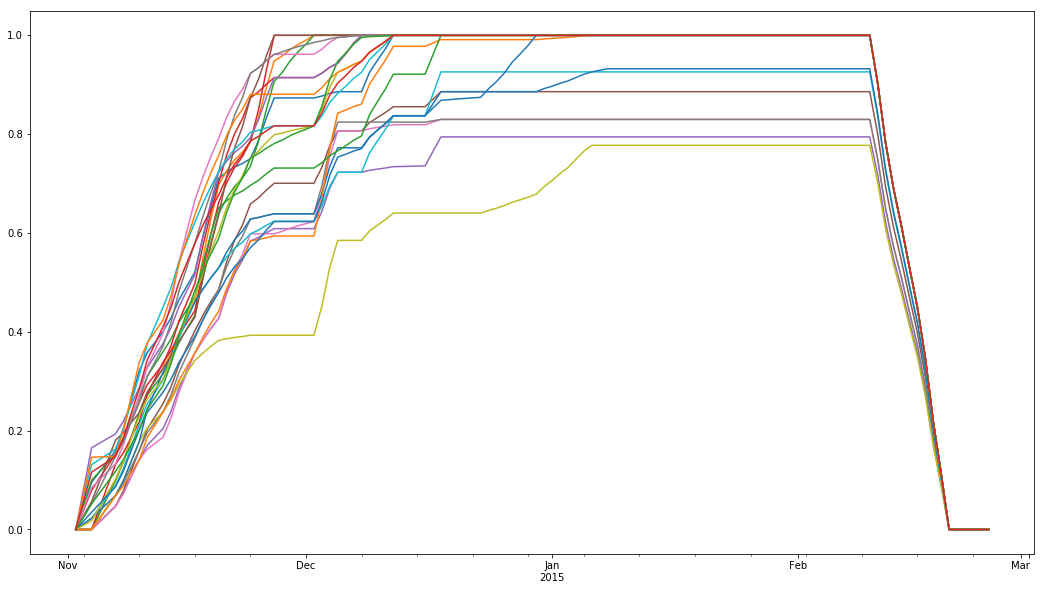

In [38]:
DailyFPAR.plot(legend=False,figsize=(18,10))

In [39]:
DayGEst = pd.DataFrame(index = DailyFPAR.index, columns = DailyFPAR.columns)
Radn = Data.loc[DaylightIndex,'IncomingRadnMJ'].resample('24h',base=6).sum()
Radn.index = Radn.index.normalize()
Temp = Data.loc[DaylightIndex, 'AirTemperature'].resample('24h', base=6).mean()
Temp.index = Temp.index.normalize()
for plot in DayGEst:
    DayGEst.loc[:,plot] = estGDay((1-DailyFPAR.loc[:,plot]) * Radn.loc[DailyFPAR.index,('Expt','Expt')],
                                 Temp.loc[DailyFPAR.index,('Expt','Expt')])

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


In [40]:
DayGEst.index.name='Date'

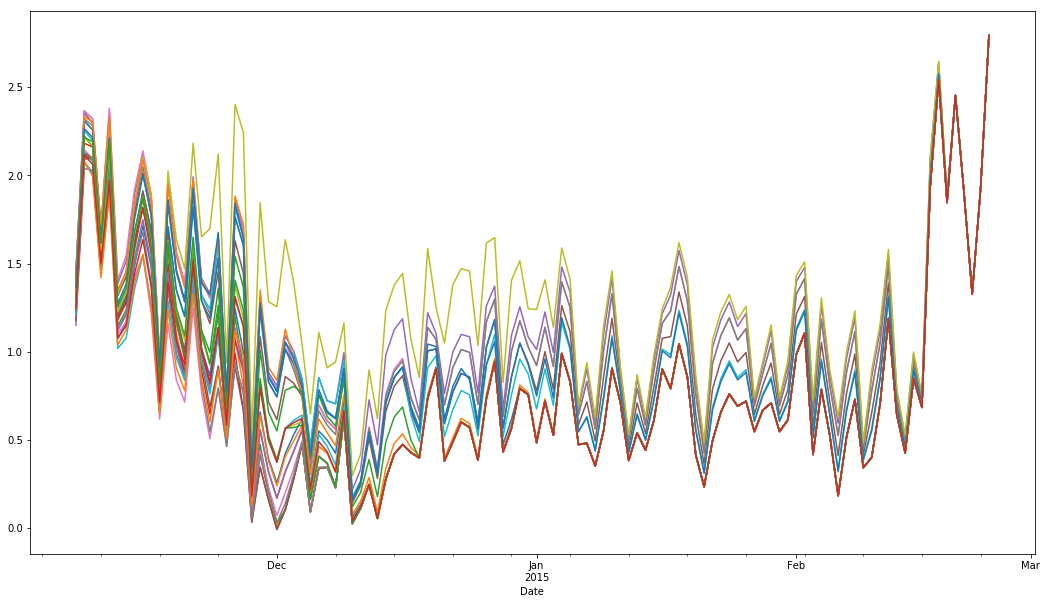

In [41]:
DayGEst.plot(figsize=(18,10), legend = False)

In [42]:
DayGEst.to_pickle('.\DataFrames\SoilHeatFluxDayEst.pkl')

## Have a look at Dark heat flux

In [43]:
DarkIndex = Data.IncomingRadnMJ.where(Data.IncomingRadnMJ<0.002)
DarkIndex.dropna(inplace=True)
DarkIndex = DarkIndex.index.tolist()

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


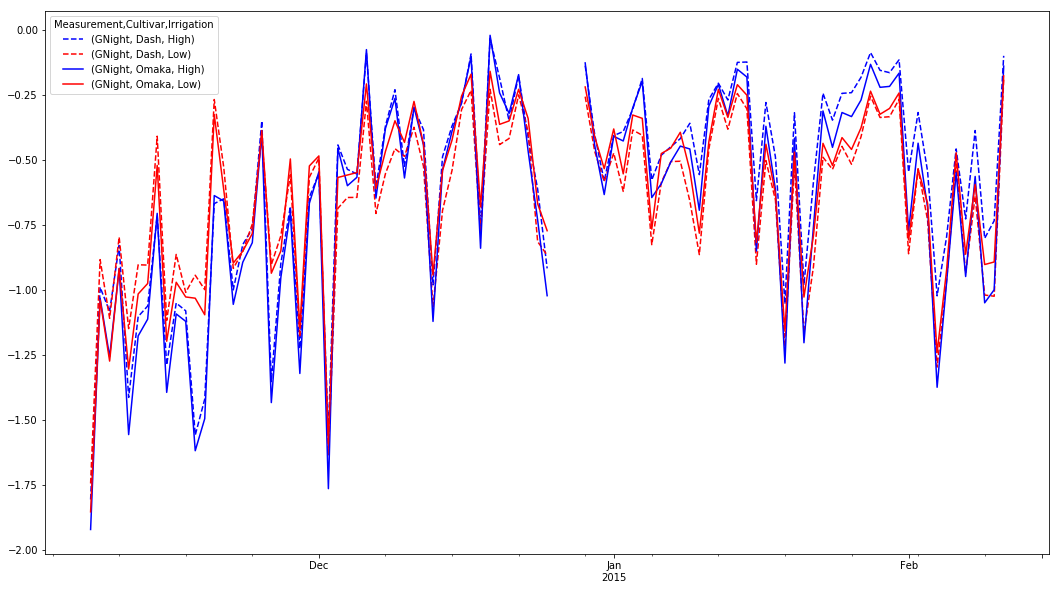

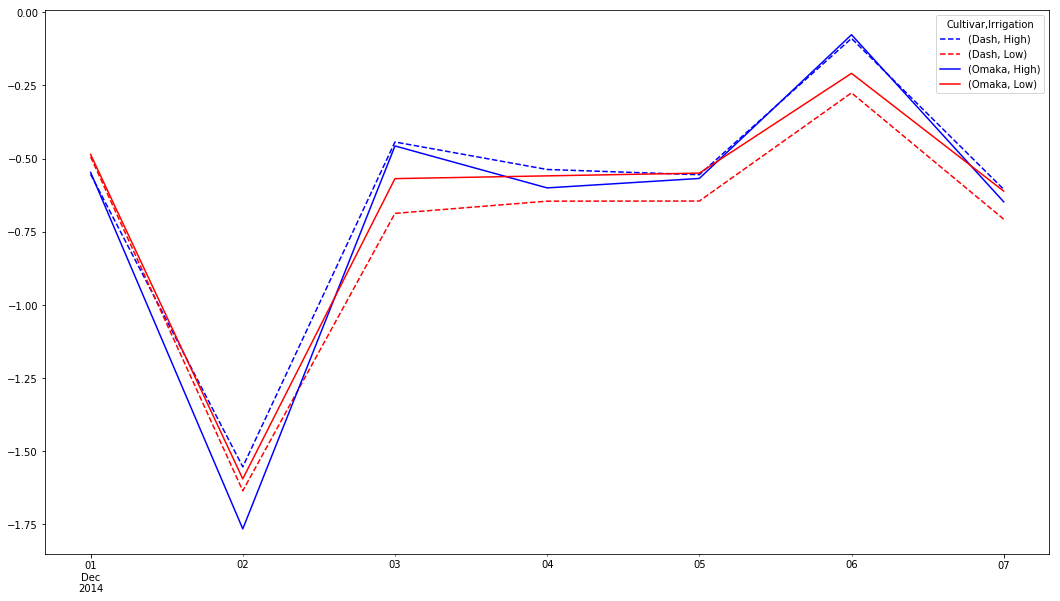

In [44]:
SoilHeatFluxMJNightMeans = SoilHeatFluxMJMeans.loc[DarkIndex,:].resample('24h',base=6).sum()
SoilHeatFluxMJNightMeans.index = SoilHeatFluxMJNightMeans.index.normalize()

GNight = SoilHeatFluxMJNightMeans.loc['2014-11-03':,:].values

tup = ['GNight']
reps = [1,2,3]
NewIndex = pd.MultiIndex.from_product([tup,Cultivars,Irrigs],names=['Measurement','Cultivar','Irrigation'])
GNightDF = pd.DataFrame(data = GNight, index = IncommingRadnDaylight.index, columns = NewIndex)
GNightDF.loc[pd.to_datetime(['2014-12-26 00:00:00',
                           '2014-12-27 00:00:00',
                           '2014-12-28 00:00:00',
                           '2015-02-12 00:00:00',
                           '2015-02-13 00:00:00',
                            '2015-02-14 00:00:00',
                            '2015-02-15 00:00:00',
                            '2015-02-16 00:00:00',
                            '2015-02-17 00:00:00',
                            '2015-02-18 00:00:00',
                            '2015-02-19 00:00:00',
                            '2015-02-20 00:00:00',
                            '2015-02-21 00:00:00',
                            '2015-02-22 00:00:00',
                            '2015-02-23 00:00:00',
                            '2015-02-24 00:00:00']),:] = np.nan
GNightDF.loc['2014-11-07':].plot(figsize=(18,10),style=['b--','r--','b-','r-'],)
GNightDF.loc['2014-12-1':'2014-12-7'].groupby(level=['Cultivar','Irrigation'],axis=1).mean().plot(figsize=(18,10),style=['b--','r--','b-','r-'])

In [45]:
def SliceFullPlotsDark(CompleteData,Variable):
    Chunk = CompleteData.loc[:,Variable]
    NewIndex = pd.MultiIndex.from_product([Cultivars,['Low','Mid','High'],[1,2,3,4]],names=['Cultivar','Irrigation',''])
    Chunk.columns = NewIndex
    SubIndex = pd.MultiIndex.from_product([Cultivars,['Low','High'],[1,3,4]],names=['Cultivar','Irrigation',''])
    SubChunk = Chunk.loc[DarkIndex,SubIndex]
    SubChunkGroup = SubChunk.groupby(level=('Cultivar','Irrigation'), axis=1).mean()
    SubChunkAgregate = SubChunkGroup.resample('24h',base=6).mean()
    SubChunkAgregate.index = SubChunkAgregate.index.normalize()
    SubChunkUnstack = SubChunkAgregate.unstack()
    return SubChunkUnstack
    

In [46]:
LongG = GNightDF.loc[:,('GNight')].unstack(0)
LongDataDark = pd.DataFrame(LongG, columns = ['GDark'])
for cul in Cultivars:
    for irr in IrrigationsShort:
        LongDataDark.loc[(cul,irr),'AirTemperature'] = Data.loc[DarkIndex,'AirTemperature'].loc['2014-11-04':,:].resample('24h',base=6).mean().values
        LongDataDark.loc[(cul,irr),'RelativeHumidity'] = Data.loc[DarkIndex,'RelativeHumidity'].loc['2014-11-04':,:].resample('24h',base=6).mean().values
        LongDataDark.loc[(cul,irr),'Windspeed'] = Data.loc[DarkIndex,'Windspeed'].loc['2014-11-04':,:].resample('24h',base=6).mean().values
        LongDataDark.loc[(cul,irr),'IncomingRadnMJ'] = Data.loc[DarkIndex,'IncomingRadnMJ'].loc['2014-11-04':,:].resample('24h',base=6).sum().values

LongDataDark.loc[:,'fPAR'] = CoverData.groupby(level=['Cultivar','Irrigation'],axis=1).mean().unstack()
LongDataDark.loc[:,'SurfaceSoilTemp'] = SliceFullPlots(Data,'SurfaceSoilTemp')
LongDataDark.loc[:,'TempAirSoil1Diff'] = LongDataDark.loc[:,'AirTemperature'] - SliceFullPlots(Data,'SurfaceSoilTemp') 
SubIndex = pd.MultiIndex.from_product([['TopTemp'],Cultivars,['Low','High'],[1,3,4]],names=['Measurement','Cultivar','Irrigation',''])
Temp = TopTempDF.loc[DarkIndex,SubIndex].groupby(level=('Cultivar','Irrigation'),axis=1).mean().resample('24h',base=6).mean()
Temp.index = Temp.index.normalize()
LongDataDark.loc[:,'SoilTemp15'] = Temp.unstack()
LongDataDark.loc[:,'TempAirSoil15Diff'] = LongDataDark.loc[:,'AirTemperature'] - LongDataDark.loc[:,'SoilTemp15'] 
SubIndex = pd.MultiIndex.from_product([['TopWater'],Cultivars,['Low','High'],[1,3,4]],names=['Measurement','Cultivar','Irrigation',''])
Temp = TopWaterDF.loc[DarkIndex,SubIndex].groupby(level=('Cultivar','Irrigation'),axis=1).mean().resample('24h',base=6).mean()
Temp.index = Temp.index.normalize()
LongDataDark.loc[:,'SoilWater'] = Temp.unstack()


C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


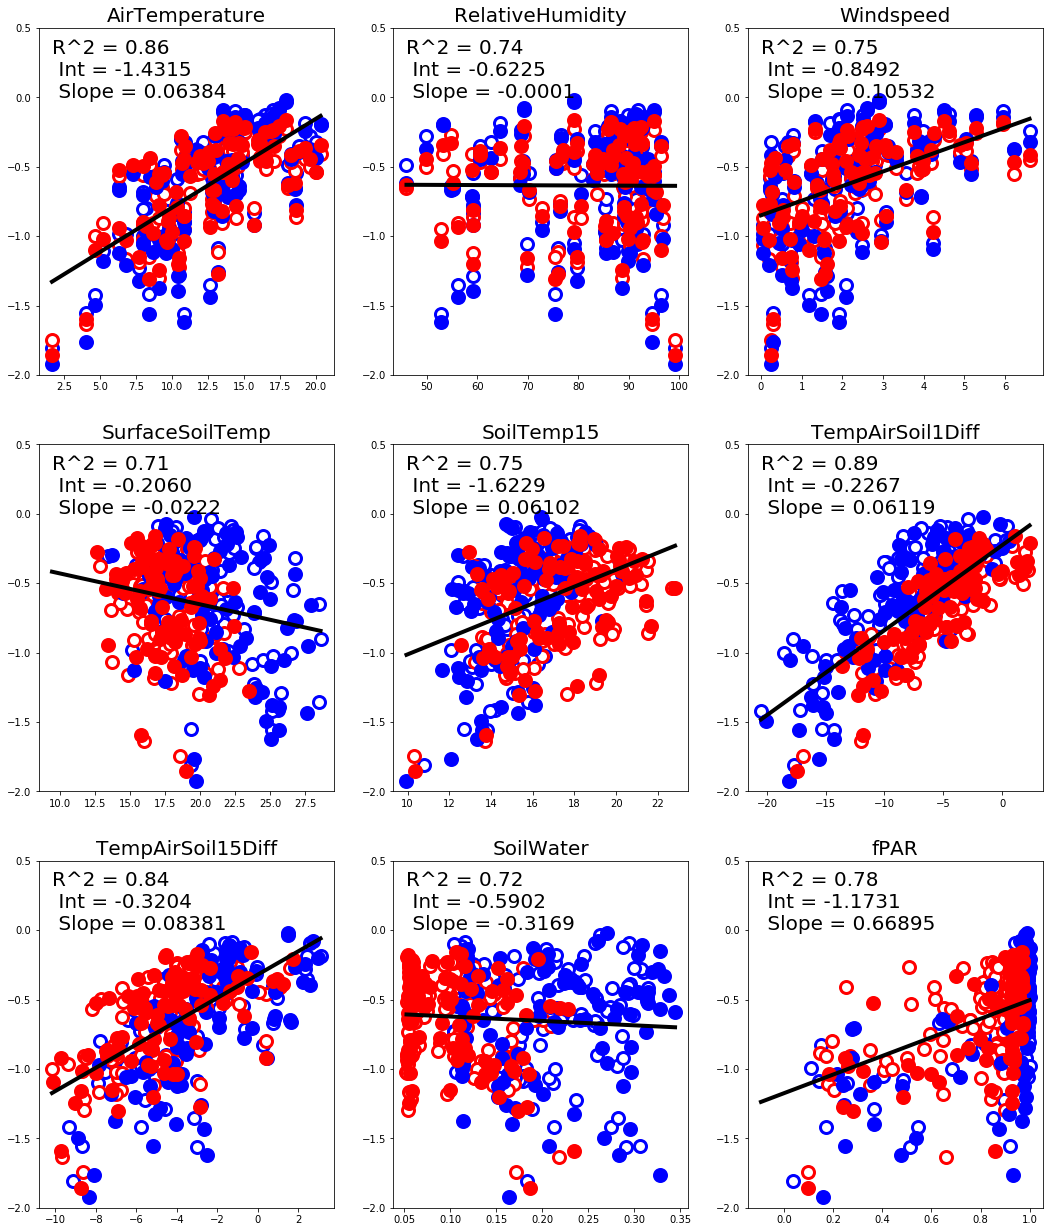

<Figure size 1296x720 with 0 Axes>

In [47]:
Graph = plt.figure(figsize=(18,60))
start = '2014-12-10'
end = '2015-02-10'
plt.figure(figsize=(18,10))
ecols = ['b','r','b','r']
fcols = ['w','w','b','r']
Irrigations = ['High','Low']
pannel = 1
Descriptors = ['AirTemperature','RelativeHumidity',
               'Windspeed','SurfaceSoilTemp','SoilTemp15','TempAirSoil1Diff',
               'TempAirSoil15Diff','SoilWater','fPAR']
for des in Descriptors:
    DailyDescriptor = LongDataDark.loc[:,des]
    fig = Graph.add_subplot(8,3,pannel)
    pos = 0
    for cul in Cultivars:
        for irr in Irrigations:
            fig.plot(LongDataDark.loc[(cul,irr),des].loc['2014-11-07':],
                LongDataDark.loc[(cul,irr),'GDark'].loc['2014-11-07':],
                     'o',mec=ecols[pos],mfc=fcols[pos],mew = 3, markersize = 12,)
            pos+=1  
    
    X = LongDataDark.loc[:,LongDataDark.columns.isin([des])]
    Y = LongDataDark.loc[:,'GDark']
    ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                            sm.add_constant(X), # X variable
                                            missing='drop',                                     # ignor and data where one value is missing
                                            hasconst=False) 
    Regres = ModTemp.fit(); 
    Xs = []
    Xs.append(X.min())
    Xs.append(X.max())
    Ys = []
    Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
    Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
    fig.plot(Xs,Ys,'-', linewidth = 4, color='k')
    fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
    fig.text(X.min(),-0,fitR2,fontsize=20)
    fig.set_ylim(-2,0.5)
    fig.set_title(des, fontsize = 20)
    pannel +=1

Text(-0.298266,2,'R^2 = 0.73\n Int = -0.4346\n Slope = -0.2415')

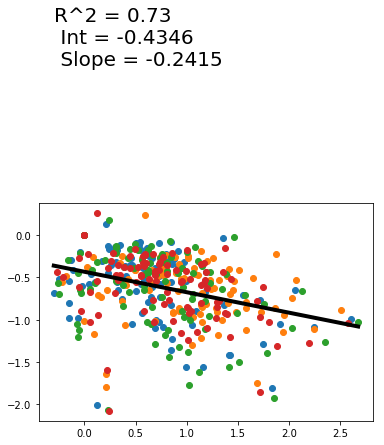

In [48]:
for cul in Cultivars:
    for irr in Irrigations:
        Day = LongData.loc[(cul,irr),'GDay']
        Night = LongDataDark.loc[(cul,irr),'GDark']
        plt.plot(Day,Night,'o')

X = LongData.loc[:,'GDay']
Y = LongDataDark.loc[:,'GDark']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Xs = []
Xs.append(X.min())
Xs.append(X.max())
Ys = []
Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
plt.plot(Xs,Ys,'-', linewidth = 4, color='k')
fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\n Int = ' + str(Regres.params[0])[:7] + '\n Slope = ' + str(Regres.params[1])[:7]
plt.text(X.min(),2.,fitR2,fontsize=20)        


In [49]:
Descriptors = ['AirTemperature','RelativeHumidity','IncomingRadnMJ','Windspeed',
              'SurfaceSoilTemp','SoilTemp15','TempAirSoil1Diff',
               'TempAirSoil15Diff','SoilWater','fPAR']
X = LongDataDark.loc[:,LongDataDark.columns.isin(Descriptors)]
Y = LongDataDark.loc[:,'GDark']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GDark   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     802.3
Date:                Fri, 30 Aug 2019   Prob (F-statistic):          2.60e-235
Time:                        11:31:16   Log-Likelihood:                 152.30
No. Observations:                 376   AIC:                            -286.6
Df Residuals:                     367   BIC:                            -251.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4297      0.133    -10.737      0.000      -1.691      -1.168
AirTemperature        0.0265      0.002     15.874      0.000       0.023       0.030
RelativeHumidity      0.0086      0.001      9.319      0.000       0.007       0.010
Windspeed             0.0411      0.007      6.240      0.000       0.028       0.054
IncomingRadnMJ        3.7324      1.127      3.313      0.001       1.517       5.948
fPAR                  0.4163      0.044      9.445      0.000       0.330       0.503
SurfaceSoilTemp       0.0013      0.002      0.710      0.478      -0.002       0.005
TempAirSoil1Diff      0.0252      0.002     16.068      0.000       0.022       0.028
SoilTemp15           -0.0188      0.004     -4.264      0.000      -0.027      -0.010
TempAirSoil15Diff     0.0453      0.004     10.586      0.000       0.037       0.054
SoilWater            -0.5948      0.169     -3.517      0.000      -0.927      -0.262
==============================================================================
Omnibus:                        1.958   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.826
Skew:                          -0.061   Prob(JB):                        0.401
Kurtosis:                       3.319   Cond. No.                     1.07e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
Descriptors = ['AirTemperature','fPAR']
X = LongDataDark.loc[:,LongDataDark.columns.isin(Descriptors)]
Y = LongDataDark.loc[:,'GDark']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Regres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  GDark   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1067.
Date:                Fri, 30 Aug 2019   Prob (F-statistic):          1.26e-182
Time:                        11:31:16   Log-Likelihood:                 7.7723
No. Observations:                 376   AIC:                            -9.545
Df Residuals:                     373   BIC:                             2.244
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7894      0.052    -34.112      0.000      -1.893      -1.686
AirTemperature     0.0516      0.003     15.438      0.000       0.045       0.058
fPAR               0.6166      0.056     11.065      0.000       0.507       0.726
==============================================================================
Omnibus:                       22.954   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.399
Skew:                          -0.607   Prob(JB):                     3.05e-06
Kurtosis:                       3.386   Cond. No.                         73.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
def EstGDarkMJ(AirTemp,FPAR):
    Constant = -1.9157
    AirTempEff = np.multiply(AirTemp.values,0.0545)
    FPAREff = np.multiply(FPAR.values,0.666)  # 0.1% of the number of the beast   
    return Constant + AirTempEff + FPAREff

In [52]:
LongDataDark.loc[:,'EstGDarkMJ'] = EstGDarkMJ(LongDataDark.loc[:,'AirTemperature'],
                                  LongDataDark.loc[:,'fPAR'])

Text(-2.00425,-0.7,'R^2 = 0.89\nInt = 0.00814\nSlope = 0.93917')

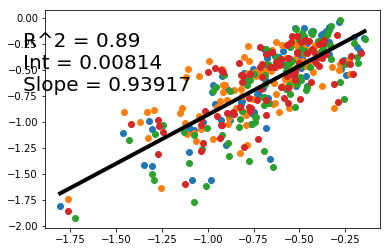

In [53]:
for cul in Cultivars:
    for irr in Irrigations:
        Obs = LongDataDark.loc[(cul,irr),'GDark']
        Pred = LongDataDark.loc[(cul,irr),'EstGDarkMJ']
        plt.plot(Pred,Obs,'o')

X = LongDataDark.loc[:,'EstGDarkMJ']
Y = LongDataDark.loc[:,'GDark']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Regres = ModTemp.fit(); 
Xs = []
Xs.append(X.min())
Xs.append(X.max())
Ys = []
Ys.append(Regres.params[0] + Xs[0]*Regres.params[1])
Ys.append(Regres.params[0] + Xs[1]*Regres.params[1])
plt.plot(Xs,Ys,'-', linewidth = 4, color='k')
fitR2 = 'R^2 = ' + str(Regres.rsquared)[:4] + '\nInt = ' + str(Regres.params[0])[:7] + '\nSlope = ' + str(Regres.params[1])[:7]
plt.text(X.min()-.2,-0.7,fitR2,fontsize=20)        


## Night time soil heat flux can be estimated by
 -1.9157 + AirT * 0.0545 + fPAR * 0.666
## So we can get an estimate of GNight for each plot

In [54]:
NightGEst = pd.DataFrame(index = DailyFPAR.index, columns = DailyFPAR.columns)
Temp = Data.loc[DaylightIndex, 'AirTemperature'].resample('24h', base=6).mean()
Temp.index = Temp.index.normalize()
for plot in NightGEst:
    NightGEst.loc[:,plot] = EstGDarkMJ(Temp.loc[DailyFPAR.index,('Expt','Expt')],
                                     DailyFPAR.loc[:,plot])

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


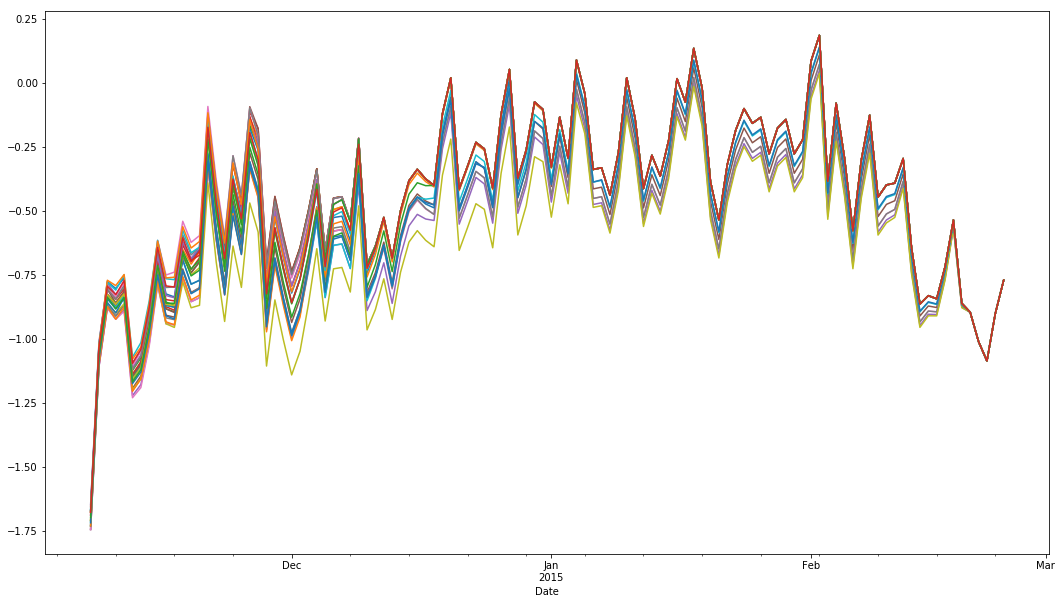

In [55]:
NightGEst.plot(figsize=(18,10),legend=False)

In [56]:
NightGEst.to_pickle('.\DataFrames\SoilHeatfluxNightEst.pkl')

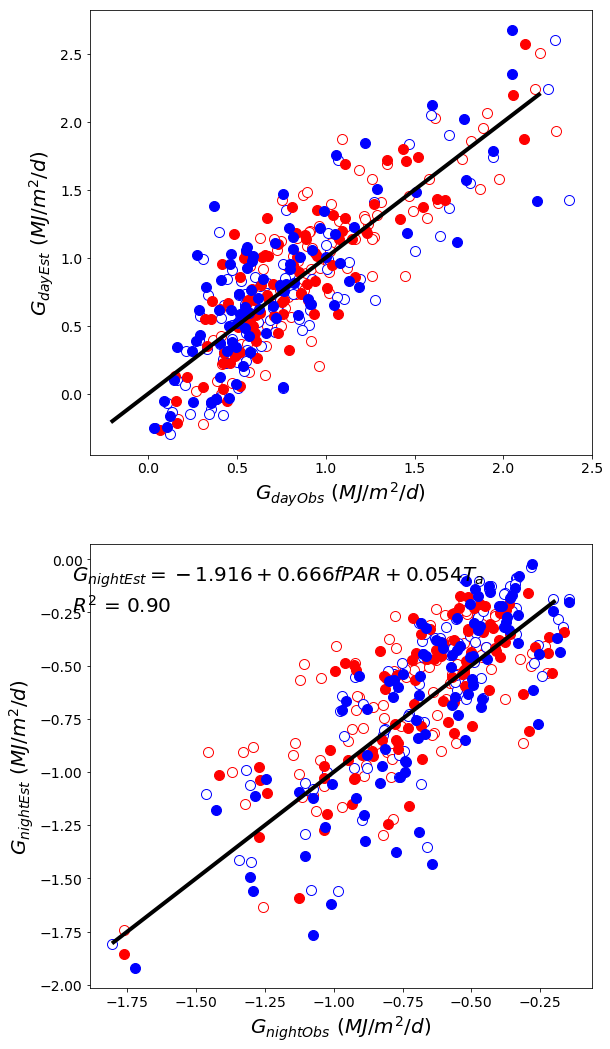

In [57]:
Graph = plt.figure(figsize=(9,18))

Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'High']
colors = ['r','b']
cultColors = ['w','w','r','b']
irrigColors = ['r','b','r','b']
cultLines = ['--','--','-','-']
alphas = [0.2,0.3]

fig = Graph.add_subplot(2,1,2)
Pos =0
for cul in Cultivars:
    for irr in Irrigations:
        Obs = LongDataDark.loc[(cul,irr),'GDark']
        Pred = LongDataDark.loc[(cul,irr),'EstGDarkMJ']
        fig.plot(Pred,Obs,'o',mec=irrigColors[Pos],mfc=cultColors[Pos],markersize=10)
        Pos += 1

X = LongDataDark.loc[:,'EstGDarkMJ']
Y = LongDataDark.loc[:,'GDark']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Xs = [-1.8,-0.2]
plt.plot(Xs,Xs,'-', linewidth = 4, color='k')
plt.tick_params(labelsize=14)
plt.ylabel('$G_{nightEst}$ $(MJ/m^2/d)$', fontsize=20, weight='bold')
plt.xlabel('$G_{nightObs}$ $(MJ/m^2/d)$', fontsize=20, weight='bold')
fitR2 = '$R^2$ = 0.90'
plt.text(-1.95,-0.25,fitR2,fontsize=20)  
model = '$G_{nightEst} = -1.916 + 0.666 fPAR + 0.054 T_a$'
plt.text(-1.95, -0.1,model,fontsize=20)

fig = Graph.add_subplot(2,1,1)
Pos = 0
for cul in Cultivars:
    for irr in Irrigations:
        Obs = LongData.loc[(cul,irr),'GDay']
        Pred = LongData.loc[(cul,irr),'EstGDayMJ']
        fig.plot(Pred,Obs,'o',mec=irrigColors[Pos],mfc=cultColors[Pos],markersize=10)
        Pos += 1
        
Xs = [-.2,2.2]
plt.plot(Xs,Xs,'-', linewidth = 4, color='k')
plt.tick_params(labelsize=14)   
plt.ylabel('$G_{dayEst}$ $(MJ/m^2/d)$', fontsize=20, weight='bold')
plt.xlabel('$G_{dayObs}$ $(MJ/m^2/d)$', fontsize=20, weight='bold')
fitR2 = '$R^2$ = 0.93' 
#plt.text(-0.4,2.5,fitR2,fontsize=20) 
model = '$G_{dayEst} = 0.71 + 0.21R_s(1-fPAR) + 0.073 T_a$'
#plt.text(-0.4, 2.8,model,fontsize=20)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


Text(-0.4,2.7,'(d)')

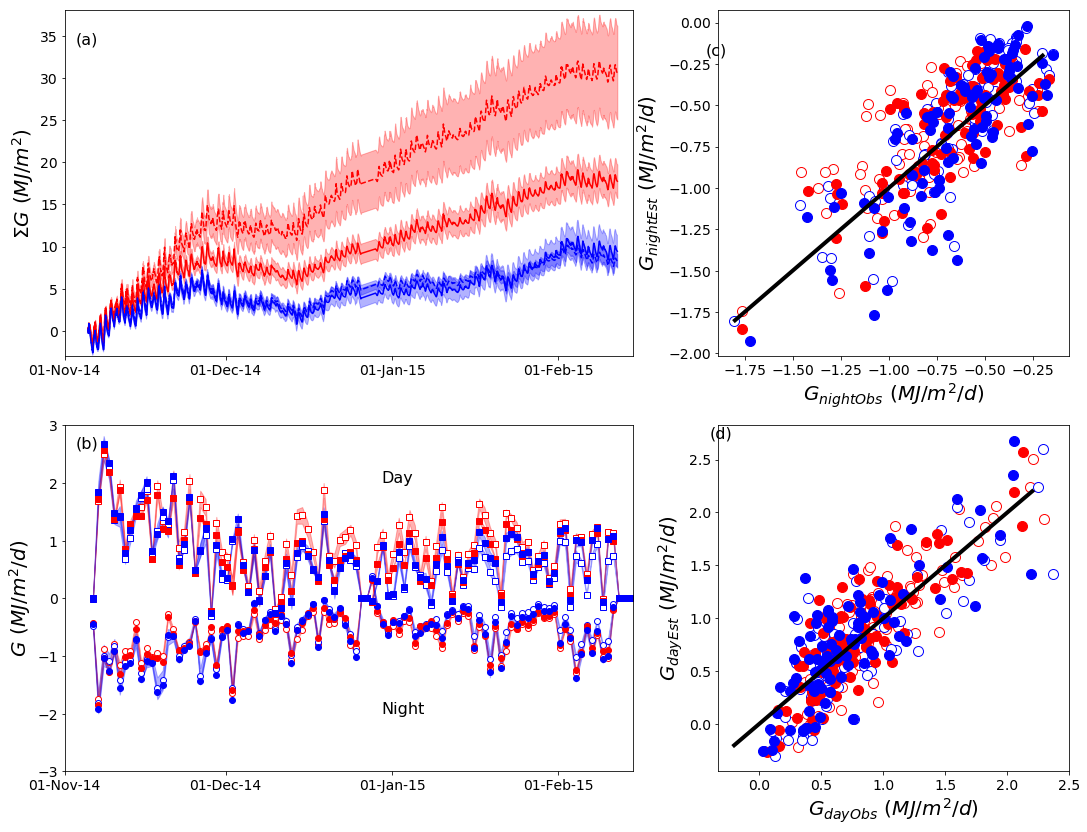

In [58]:
Graph = plt.figure(figsize=(18,14))
Shape = (2,14)
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'High']
colors = ['r','b']
cultColors = ['w','w','r','b']
irrigColors = ['r','b','r','b']
cultLines = ['--','--','-','-']
alphas = [0.2,0.3]

fig = plt.subplot2grid(Shape,(0,0),colspan=8)#Graph.add_subplot(2,1,1)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = SoilHeatFluxMJ.index
        Med = SoilHeatFluxMJ.loc[:,(Cul,Irr)].cumsum().mean(axis=1)
        SEM = SoilHeatFluxMJ.loc[:,(Cul,Irr)].cumsum().std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,cultLines[CulPos],color=irrigColors[IrrPos],label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1
plt.xlim('2014-11-1','2015-02-15')
plt.ylim(-3,38)
plt.ylabel('$\Sigma G$ $(MJ/m^2)$', fontsize=20, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=14)    
plt.text('2014-11-3',34,'(a)',fontsize=16)

fig = plt.subplot2grid(Shape,(1,0),colspan=8)#Graph.add_subplot(2,1,2)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = SoilHeatFluxMJ.loc[DarkIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().index
        Med = SoilHeatFluxMJ.loc[DarkIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().mean(axis=1)
        SEM = SoilHeatFluxMJ.loc[DarkIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1

CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = SoilHeatFluxMJ.loc[DaylightIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().index
        Med = SoilHeatFluxMJ.loc[DaylightIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().mean(axis=1)
        SEM = SoilHeatFluxMJ.loc[DaylightIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'s',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],label = Cul + ' ' + Irr)
        IrrPos += 1
        CulPos+=1
plt.ylim(-3,3)
plt.xlim('2014-11-1','2015-02-15')
plt.ylabel('$G$ $(MJ/m^2/d)$', fontsize=20, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.tick_params(labelsize=14)    
plt.text('2014-11-3',2.6,'(b)',fontsize=16)
plt.text('2014-12-30', 2,'Day',fontsize=16)
plt.text('2014-12-30', -2,'Night',fontsize=16)

fig = plt.subplot2grid(Shape,(0,9),colspan=5)#Graph.add_subplot(2,1,2)
Pos =0
for cul in Cultivars:
    for irr in Irrigations:
        Obs = LongDataDark.loc[(cul,irr),'GDark']
        Pred = LongDataDark.loc[(cul,irr),'EstGDarkMJ']
        fig.plot(Pred,Obs,'o',mec=irrigColors[Pos],mfc=cultColors[Pos],markersize=10)
        Pos += 1

X = LongDataDark.loc[:,'EstGDarkMJ']
Y = LongDataDark.loc[:,'GDark']
ModTemp = sm.regression.linear_model.OLS(Y,  # Y variable
                                        sm.add_constant(X), # X variable
                                        missing='drop',                                     # ignor and data where one value is missing
                                        hasconst=False) 
Xs = [-1.8,-0.2]
plt.plot(Xs,Xs,'-', linewidth = 4, color='k')
plt.tick_params(labelsize=14)
plt.ylabel('$G_{nightEst}$ $(MJ/m^2/d)$', fontsize=20, weight='bold')
plt.xlabel('$G_{nightObs}$ $(MJ/m^2/d)$', fontsize=20, weight='bold')
fitR2 = '$R^2$ = 0.90'
#plt.text(-1.95,-0.25,fitR2,fontsize=20)  
model = '$G_{nightEst} = -1.916 + 0.666 fPAR + 0.054 T_a$'
#plt.text(-1.95, -0.1,model,fontsize=20)
plt.text(-1.95,-.2,'(c)',fontsize=16)

fig = plt.subplot2grid(Shape,(1,9),colspan=5)#Graph.add_subplot(2,1,1)
Pos = 0
for cul in Cultivars:
    for irr in Irrigations:
        Obs = LongData.loc[(cul,irr),'GDay']
        Pred = LongData.loc[(cul,irr),'EstGDayMJ']
        fig.plot(Pred,Obs,'o',mec=irrigColors[Pos],mfc=cultColors[Pos],markersize=10)
        Pos += 1
        
Xs = [-.2,2.2]
plt.plot(Xs,Xs,'-', linewidth = 4, color='k')
plt.tick_params(labelsize=14)   
plt.ylabel('$G_{dayEst}$ $(MJ/m^2/d)$', fontsize=20, weight='bold')
plt.xlabel('$G_{dayObs}$ $(MJ/m^2/d)$', fontsize=20, weight='bold')
fitR2 = '$R^2$ = 0.93' 
#plt.text(-0.4,2.5,fitR2,fontsize=20) 
model = '$G_{dayEst} = 0.631 + 0.091 R - 1.734 fPAR + 0.056 T_a$'
#plt.text(-0.4, 2.8,model,fontsize=20)
plt.text(-0.4,2.7,'(d)',fontsize=16)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:979: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_nested_tuple(tup)


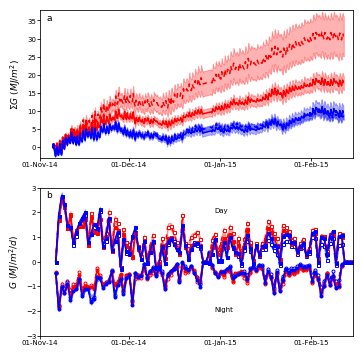

In [59]:
Graph = plt.figure(figsize=(5.6,6))
Shape = (2,14)
Cultivars = ['Dash','Omaka']
Irrigations = ['Low', 'High']
colors = ['r','b']
cultColors = ['w','w','r','b']
irrigColors = ['r','b','r','b']
cultLines = ['--','--','-','-']
gaps = [3,3,0.0001,0.0001]
alphas = [0.2,0.3]

fig = Graph.add_subplot(2,1,1)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = SoilHeatFluxMJ.index
        Med = SoilHeatFluxMJ.loc[:,(Cul,Irr)].cumsum().mean(axis=1)
        SEM = SoilHeatFluxMJ.loc[:,(Cul,Irr)].cumsum().std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,cultLines[CulPos],color=irrigColors[IrrPos],label = Cul + ' ' + Irr,dashes=(3,gaps[CulPos]))
        IrrPos += 1
        CulPos+=1
plt.xlim('2014-11-1','2015-02-15')
plt.ylim(-3,38)
plt.ylabel('$\Sigma G$ $(MJ/m^2)$', fontsize=9, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.text('2014-11-3',35,'a',fontsize=9)
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=7,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left=True,right=False, labelright=False,labelsize=7, length = 3, direction = 'out', pad = 1)
       
fig = Graph.add_subplot(2,1,2)
CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = SoilHeatFluxMJ.loc[DarkIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().index
        Med = SoilHeatFluxMJ.loc[DarkIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().mean(axis=1)
        SEM = SoilHeatFluxMJ.loc[DarkIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'o',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],label = Cul + ' ' + Irr,markersize=3,color = irrigColors[IrrPos],dashes=(3,gaps[CulPos]))
        IrrPos += 1
        CulPos+=1

CulPos = 0
for Cul in Cultivars:
    IrrPos = 0
    for Irr in Irrigations:
        Ind = SoilHeatFluxMJ.loc[DaylightIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().index
        Med = SoilHeatFluxMJ.loc[DaylightIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().mean(axis=1)
        SEM = SoilHeatFluxMJ.loc[DaylightIndex,(Cul,Irr)].loc['2014-11-07':,:].resample('24h',base=6).sum().std(axis=1)/np.sqrt(3)
        Upp = Med + SEM
        Low = Med - SEM
        plt.fill_between(Ind,Upp,Low,color = colors[IrrPos],alpha=0.3)
        plt.plot(Ind,Med,'s',mec=irrigColors[IrrPos], mfc = cultColors[CulPos],label = Cul + ' ' + Irr,markersize=3,color = irrigColors[IrrPos],dashes=(3,gaps[CulPos]))
        IrrPos += 1
        CulPos+=1
plt.ylim(-3,3)
plt.xlim('2014-11-1','2015-02-15')
plt.ylabel('$G$ $(MJ/m^2/d)$', fontsize=9, weight='bold')
fig.xaxis.set_major_locator(mdates.MonthLocator())
fig.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
plt.text('2014-11-3',2.6,'b',fontsize=9)
plt.text('2014-12-30', 2,'Day',fontsize=7)
plt.text('2014-12-30', -2,'Night',fontsize=7)
plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=7,length = 3, direction = 'out', pad = 1)
plt.tick_params(axis='y', which='both', left=True,right=False, labelright=False,labelsize=7, length = 3, direction = 'out', pad = 1)
       
Graph.savefig('Fig_4.jpg',dpi=1000)
Graph.savefig('Fig_4.eps',dpi=1000)

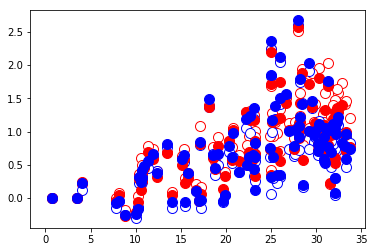

In [60]:
Pos = 0
for cul in Cultivars:
    for irr in Irrigations:
        Obs = LongData.loc[(cul,irr),'GDay']
        Pred = LongData.loc[(cul,irr),'IncomingRadnMJ']
        plt.plot(Pred,Obs,'o',mec=irrigColors[Pos],mfc=cultColors[Pos],markersize=10)
        Pos += 1
plt.plot([0,])